# Predictive Modeling and Customer Segmentation: 

# A Strategic Approach for iFood’s Marketing Campaigns

# 1 - Preface

Kelompok 1

Nama : Ronan Lazuardi, Muhammad Fariz Firdaus, Syahrul Budi Rahmadan

Batch : FTDS-SBY-002

Objective : 

URL Dataset : Customer Personality Analysis, [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

Background :

*Indonesia*

Di tengah pasar pengiriman makanan yang sangat kompetitif, memahami perilaku pelanggan sangat penting untuk keberhasilan kampanye pemasaran. Proyek yang kami lakukan bertujuan untuk memanfaatkan teknik-teknik data science guna mengoptimalkan strategi pemasaran sebuah perusahaan bernama iFood. Kami akan mengembangkan model klasifikasi untuk memprediksi perilaku pembelian pelanggan dalam kampanye iFood berikutnya, dan model clustering untuk mempersonalisasi pengalaman pelanggan. Dengan berfokus pada kelompok-kelompok pelanggan tertentu, iFood dapat memaksimalkan keuntungan yang dapat mereka peroleh dalam kampanye-kampanye mendatang.

*English*

In a very competitive food delivery market, understanding customer behavior is important for the success of marketing campaigns. This project aims to implement data science techniques to optimize iFood’s marketing strategies. We will develop a classification model to predict customer purchasing behavior in upcoming campaigns, and a clustering model to personalize the customers. By focusing on specific customer clusters, we can maximize iFood’s profit in future campaigns.

# 2 - Import Libraries

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

# 3 - Data Loading

In [3]:
# Loading file csv dataset raw

df_raw = pd.read_csv("marketing_campaign.csv", sep='\t')

Deskripsi tiap kolom/feature
|Feature|Description|
|:-|:-|
|AcceptedCmp1|1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2|1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3|1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4|1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|Response (target)|1 if customer accepted the offer in the last campaign, 0 otherwise|
|Complain|1 if customer complained in the last 2 years|
|DtCustomer|Date of customer's enrollment with the company|
|Education|Customer's level of education|
|Marital|Customer's marital status|
|Kidhome|Number of small children in customer's household|
|Teenhome|Number of teenagers in customer's household|
|Income|Customer's yearly household income|
|MntFishProducts|Amount spent on fish products in the last 2 years|
|MntMeatProducts|Amount spent on meat products in the last 2 years|
|MntFruits|Amount spent on fruits in the last 2 years|
|MntSweetProducts|Amount spent on weet products in the last 2 years|
|MntWines|Amount spent on wines in the last 2 years|
|MntGoldProds|Amount spent on gold products in the last 2 years|
|NumDealsPurchases|Number of purchases made with discount|
|NumCatalogPurchases|Number of purchases using catalogue
|NumStorePurchases|Number of purchases made directly in store|
|NumWebPurchases|Number of purchases made through company's web site|
|NumWebVisitsMonth|Number of visits to company's web site in the last month|
|Recency|Number of days since the last purchase|

In [4]:
# Copy untuk menjaga data asli
df = df_raw.copy()

In [5]:
# Menampilkan 5 baris awal
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
# Menampilkan 5 baris acak
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1886,7505,1957,PhD,Married,44155.0,1,1,19-01-2014,24,22,1,9,0,0,14,1,1,1,2,4,0,0,0,0,0,0,3,11,0
204,1030,1965,PhD,Single,40637.0,1,1,17-07-2013,72,22,0,13,0,0,3,2,1,0,3,7,0,0,0,0,0,0,3,11,0
2025,9423,1979,Master,Married,32765.0,1,0,23-02-2014,49,13,3,17,7,3,3,2,2,0,4,5,0,0,0,0,0,0,3,11,0
1228,8210,1975,Master,Married,54730.0,0,1,15-08-2013,64,318,3,17,4,7,56,5,4,1,8,4,0,0,0,0,0,0,3,11,0
249,8932,1969,Master,Together,65176.0,0,1,29-10-2012,57,960,28,183,220,70,70,4,9,6,6,6,0,0,0,0,0,0,3,11,0


In [7]:
# Menampilkan 5 baris akhir
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Mengubah tipe data kolom Dt_Customer dari object menjadi datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format= "%d-%m-%Y")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
df.shape

(2240, 29)

Dataset 'marketing_campaign.csv' terdiri dari 2240 baris dan 29 kolom. Kolom dalam dataset memiliki beberapa tipe data yaitu:

1. Int64 : 25 kolom
2. Object : 2 kolom
3. Float64 : 1 kolom
4. Datetime64[ns] : 1 kolom

In [12]:
for col in df.columns:
    print('Nilai unik', col, df[col].nunique())

Nilai unik ID 2240
Nilai unik Year_Birth 59
Nilai unik Education 5
Nilai unik Marital_Status 8
Nilai unik Income 1974
Nilai unik Kidhome 3
Nilai unik Teenhome 3
Nilai unik Dt_Customer 663
Nilai unik Recency 100
Nilai unik MntWines 776
Nilai unik MntFruits 158
Nilai unik MntMeatProducts 558
Nilai unik MntFishProducts 182
Nilai unik MntSweetProducts 177
Nilai unik MntGoldProds 213
Nilai unik NumDealsPurchases 15
Nilai unik NumWebPurchases 15
Nilai unik NumCatalogPurchases 14
Nilai unik NumStorePurchases 14
Nilai unik NumWebVisitsMonth 16
Nilai unik AcceptedCmp3 2
Nilai unik AcceptedCmp4 2
Nilai unik AcceptedCmp5 2
Nilai unik AcceptedCmp1 2
Nilai unik AcceptedCmp2 2
Nilai unik Complain 2
Nilai unik Z_CostContact 1
Nilai unik Z_Revenue 1
Nilai unik Response 2


In [13]:
# Drop kolom 'ID', 'Z_CostContact', 'Z_Revenue'

df.drop(columns=['ID','Z_CostContact','Z_Revenue'],inplace=True)

Kolom `ID`, `Z_CostContact`, `Z_Revenue` kami **drop** dikarenakan
kolom `ID` merupakan primary key / kolom identitas unik customer dan memiliki nilai unik di setiap baris,
sedangkan kolom `Z_CostContact` dan `Z_Revenue` memiliki 1 nilai yang sama sepanjang kolom,
sehingga ketiga kolom ini tidak relevan untuk dianalisa.

In [14]:
# Cek data duplikat

df.duplicated().sum()

182

Ada 182 baris di dalam dataset yang merupakan baris dengan nilai yang terduplikasi. Baris terduplikat akan dibuang karena akan mengganggu hasil prediksi nantinya.

In [15]:
# Menghapus baris duplikat

df.drop_duplicates(inplace=True)

In [16]:
# Cek data NaN / missing value

df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Ada 24 baris di dalam dataset yang merupakan baris pada kolom `Income` yang tidak memiliki nilai yaitu NaN atau Null atau Missing Value. Baris dengan missing value ini akan dibuang karena akan mengganggu hasil prediksi nantinya.

In [17]:
# Menghapus baris NaN / Missing Value

df.dropna(inplace=True)

In [18]:
# Cek shape dataset setelah drop kolom tidak relevan, baris duplikat & missing value

df.shape

(2034, 26)

Setelah drop kolom yang tidak relevan dan baris-baris yang terduplikat dan missing value, kini dataset menjadi terdiri dari 2034 baris dan 26 kolom.

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year_Birth,2034.0,1968.802852,1893.0,1959.0,1970.0,1977.0,1996.0,11.97542
Income,2034.0,52357.791544,1730.0,35528.25,51533.0,68480.75,666666.0,25526.956988
Kidhome,2034.0,0.44297,0.0,0.0,0.0,1.0,2.0,0.535914
Teenhome,2034.0,0.508358,0.0,0.0,0.0,1.0,2.0,0.54613
Dt_Customer,2034,2013-07-11 14:44:57.345132544,2012-07-30 00:00:00,2013-01-17 00:00:00,2013-07-12 12:00:00,2014-01-02 00:00:00,2014-06-29 00:00:00,NaN
Recency,2034.0,48.844641,0.0,24.0,49.0,74.0,99.0,28.983678
MntWines,2034.0,305.180924,0.0,23.0,175.5,505.0,1493.0,337.323274
MntFruits,2034.0,26.292527,0.0,2.0,8.0,33.0,199.0,39.772885
MntMeatProducts,2034.0,167.76352,0.0,16.0,68.0,230.0,1725.0,226.790697
MntFishProducts,2034.0,37.449361,0.0,3.0,12.0,50.0,259.0,54.792015


# 4 - Exploration Data Analysis

## 4.1 - `Response` (Kolom target)

In [20]:
target = df["Response"].value_counts().reset_index()
persen = df["Response"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["proportion"]
target

,Response,count,percentage
0,0,1722,0.846608
1,1,312,0.153392


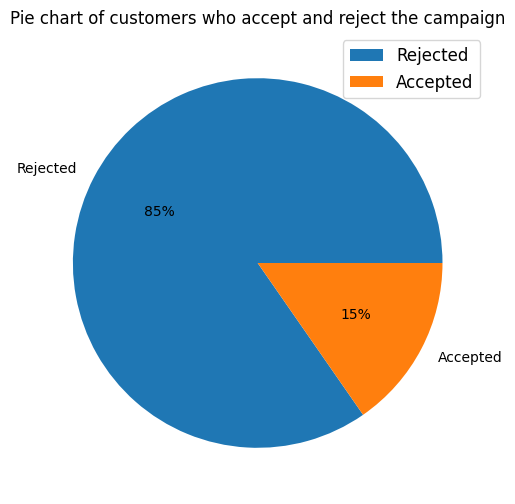

In [21]:
plt.figure(figsize=(8,6))

plt.pie(target["percentage"], labels = ['Rejected','Accepted'], autopct='%.0f%%')
plt.title("Pie chart of customers who accept and reject the campaign")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Berdasarkan plot di atas, dapat ditarik kesimpulan bahwa kolom `Response` (target) terbukti memiliki distribusi imbalanced terbukti dari keseluruhan 2034 customer sebesar 85% (1722 customer) menolak campaign dan hanya 15% (312 customer) yang menerima campaign terakhir.

Persebaran yang tidak seimbang ini berdampak negatif pada performa machine learning. Upsampling atau downsampling dapat dilakukan untuk mengurangi dampak negatif pada performa model machine learning.


In [22]:
rejected = df[df['Response'] == '0']
accepted = df[df['Response'] == '1']

## 4.2 - Kolom Numerik

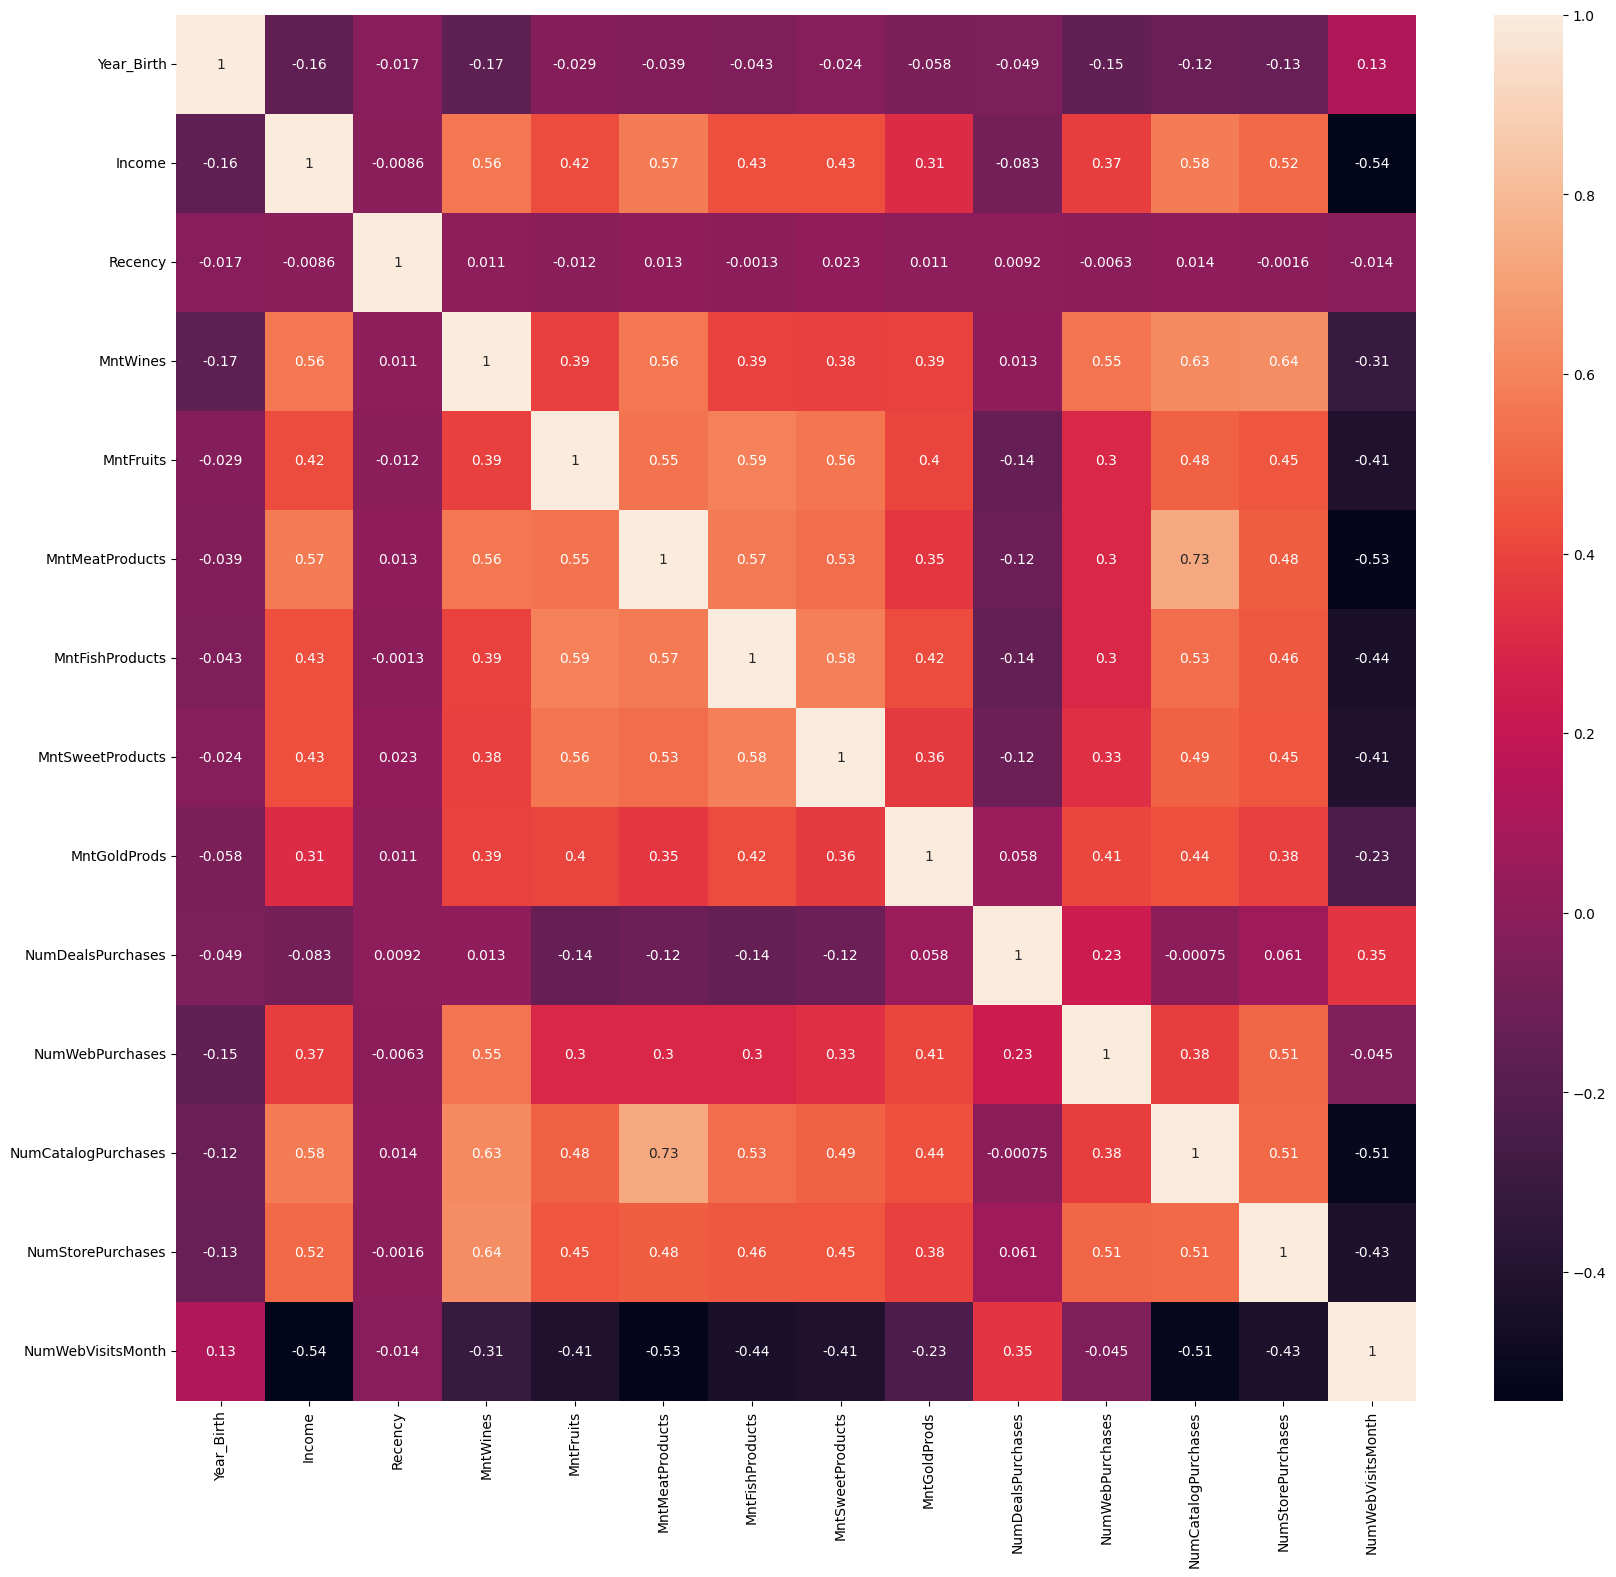

In [23]:
df_num = df[['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

corr = df_num.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True)
plt.show()

### 4.2.1 - Kolom `Year_Birth`

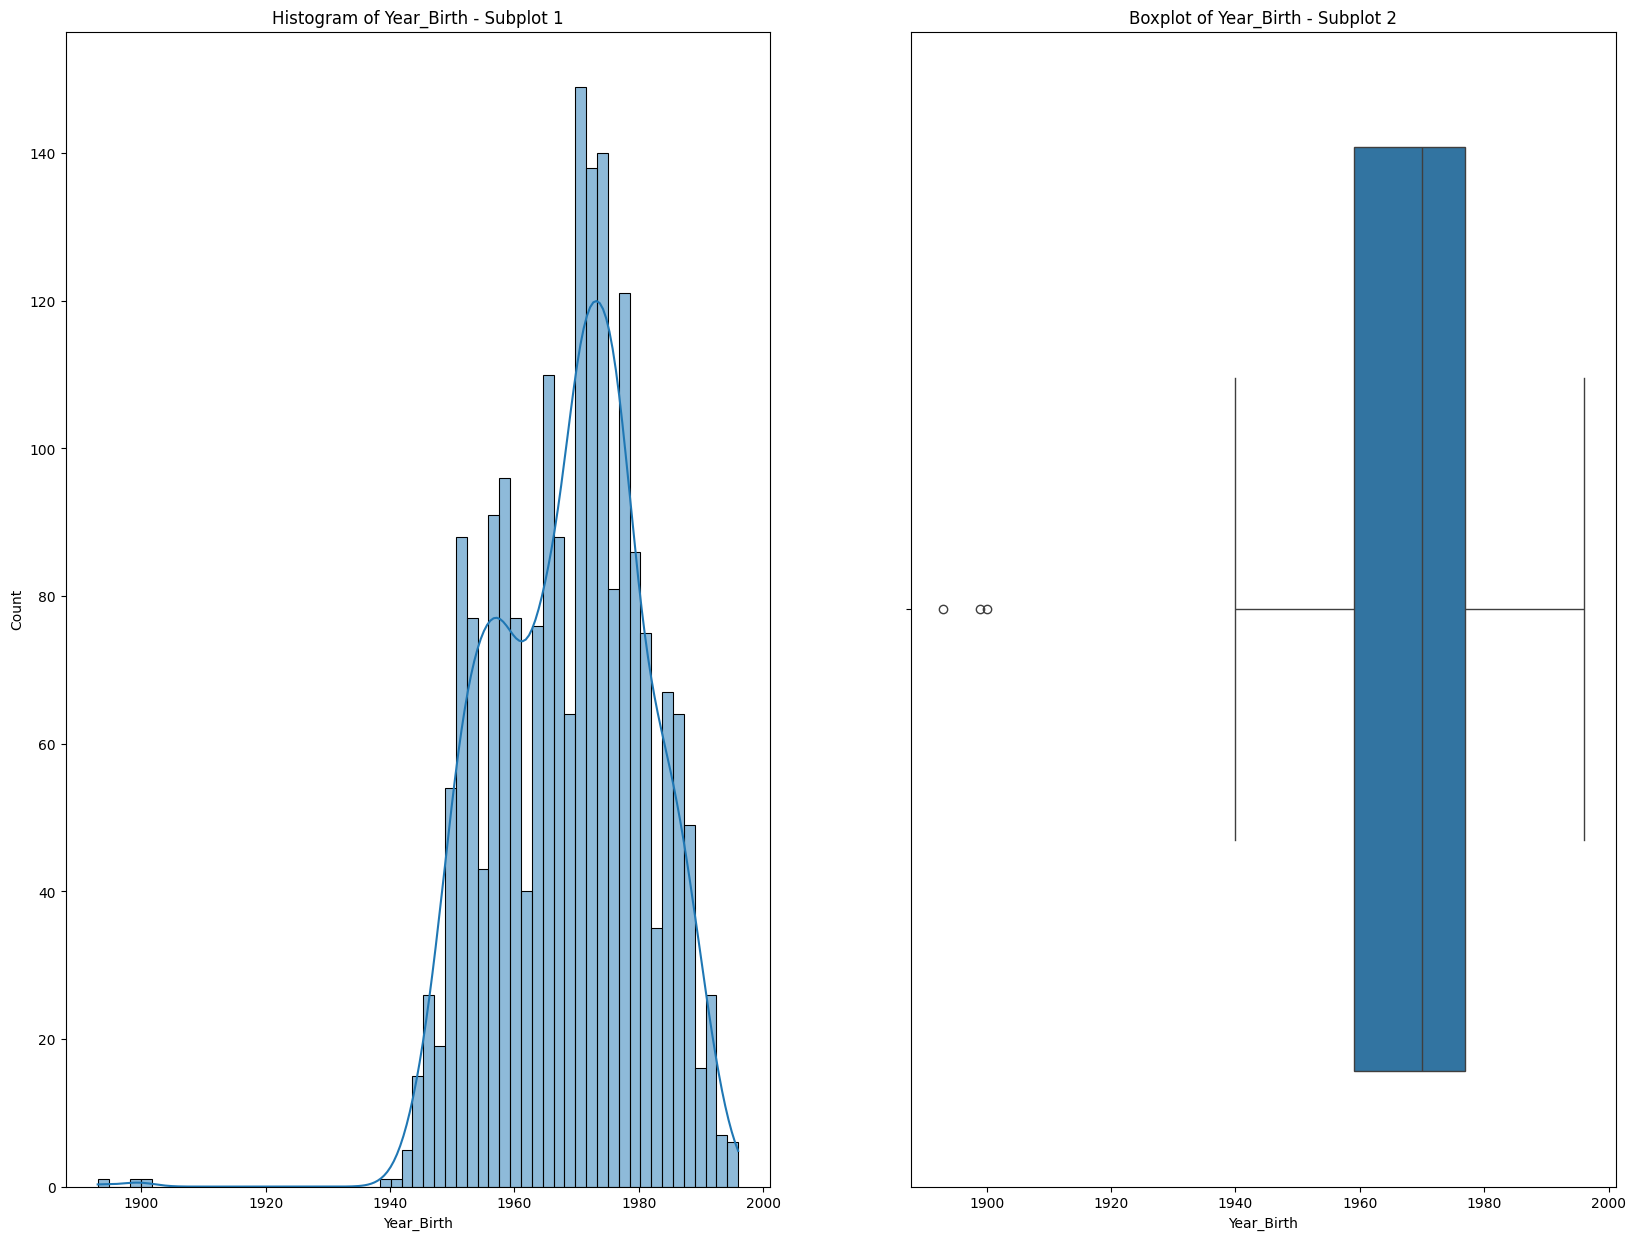

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
sns.histplot(data=df, x='Year_Birth', kde=True, bins=df['Year_Birth'].nunique(), ax=axes[0])
axes[0].set_title('Histogram of Year_Birth - Subplot 1')
sns.boxplot(data=df, x='Year_Birth', ax=axes[1])
axes[1].set_title('Boxplot of Year_Birth - Subplot 2')
plt.show()

Dari kedua plot distribusi kolom `Year_Birth` sedikit susah untuk menginterpretasikan sehingga akan dibuat kolom `Age` yang diperoleh dari selisih tahun sekarang dengan `Year_Birth.`

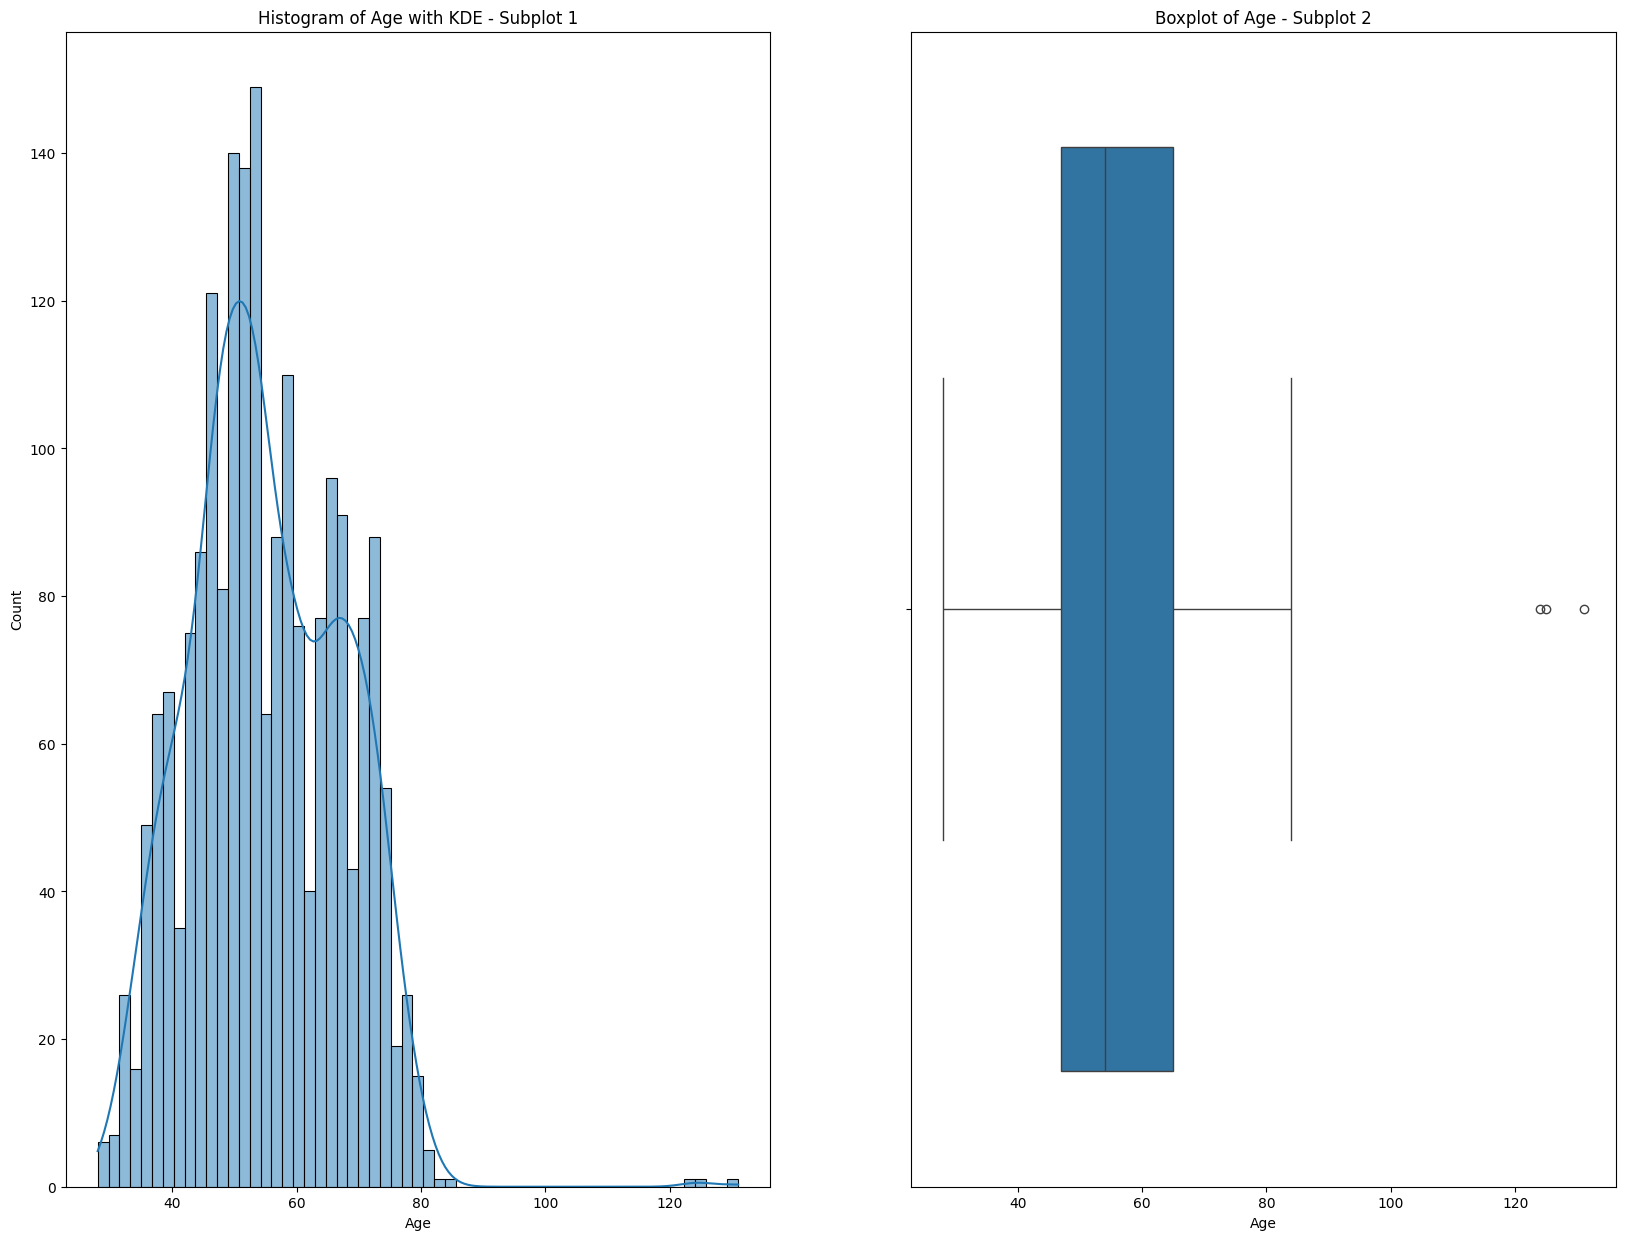

In [25]:
df['Age']= datetime.datetime.now().year - df['Year_Birth']

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
sns.histplot(data=df, x='Age', kde=True, bins=df['Age'].nunique(), ax=axes[0])
axes[0].set_title('Histogram of Age with KDE - Subplot 1')
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Age - Subplot 2')
plt.show()

In [26]:
df['Age'].mode().iloc[0]

48

In [27]:
df['Age'].describe()

count    2034.000000
mean       55.197148
std        11.975420
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

Di atas terdapat histogram plot dan boxplot yang merupakan plot dari distribusi kolom `Age`. Dari kedua plot tersebut dapat ditarik kesimpulan sebagai berikut:

- Histogram plot:
1. Mayoritas customer memiliki usia pada rentang 45 hingga 60 tahun
2. Terlihat ada kenaikan jumlah customer pada rentang 28 hingga puncaknya 48 tahun
3. Frekuensi usia terbanyak pada usia 48 tahun
4. Setelah usia 48 tahun ada naik-turun pada jumlah customer.

- Boxplot:
1. Dari keseluruhan customer ditarik nilai rata-rata pada usia 55 tahun
2. Berdasarkan nilai standar deviasi, maka mayoritas customer memiliki rentang usia bervariasi antara 44 hingga 66 tahun.
3. Terdapat outliers, ditemukan beberapa customer memiliki usia yang sangat tua.
4. Usia terendah customer adalah 28 tahun. Mengapa? Apakah tidak ada regenerasi customer lama ke customer baru?

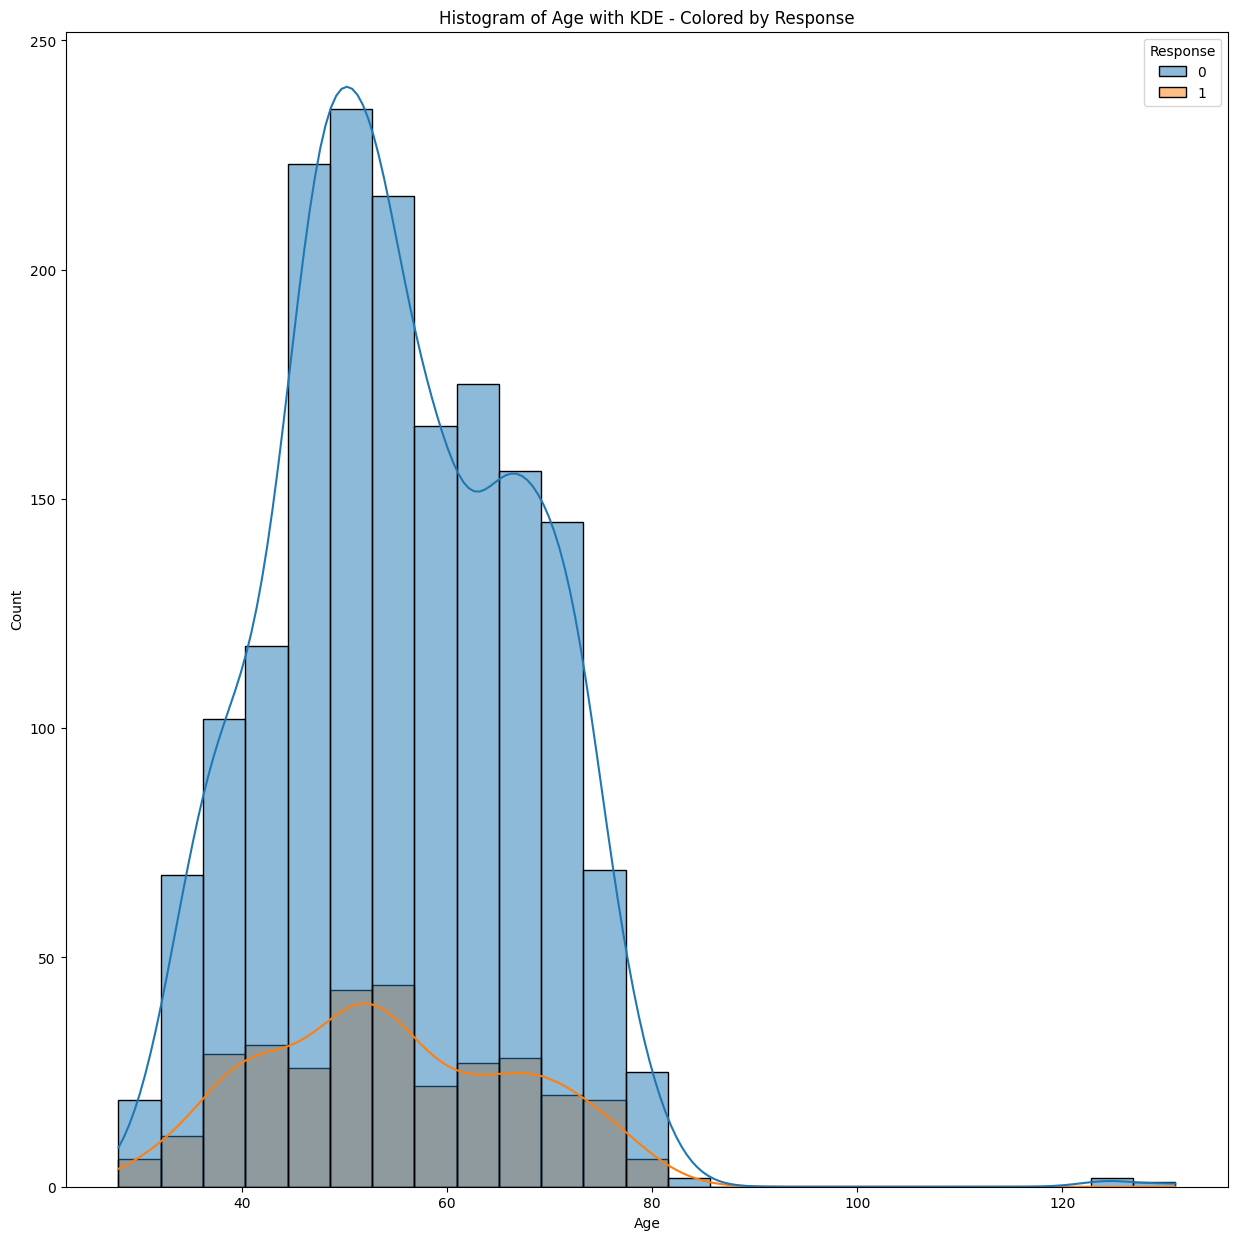

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.histplot(data=df, x='Age', kde=True, bins=25, hue='Response')
plt.title('Histogram of Age with KDE - Colored by Response')
plt.show()

Dari plot di atas dapat ditarik kesimpulan bahwa:
1. Promo campaign menarik bagi seluruh generasi
2. Customer yang menggunakan promo campaign terdistribusi dengan baik dan normal
3. Tidak ditemukan pattern khusus terkait `Age` dan `Response`

### 4.2.2 - Kolom `Income`

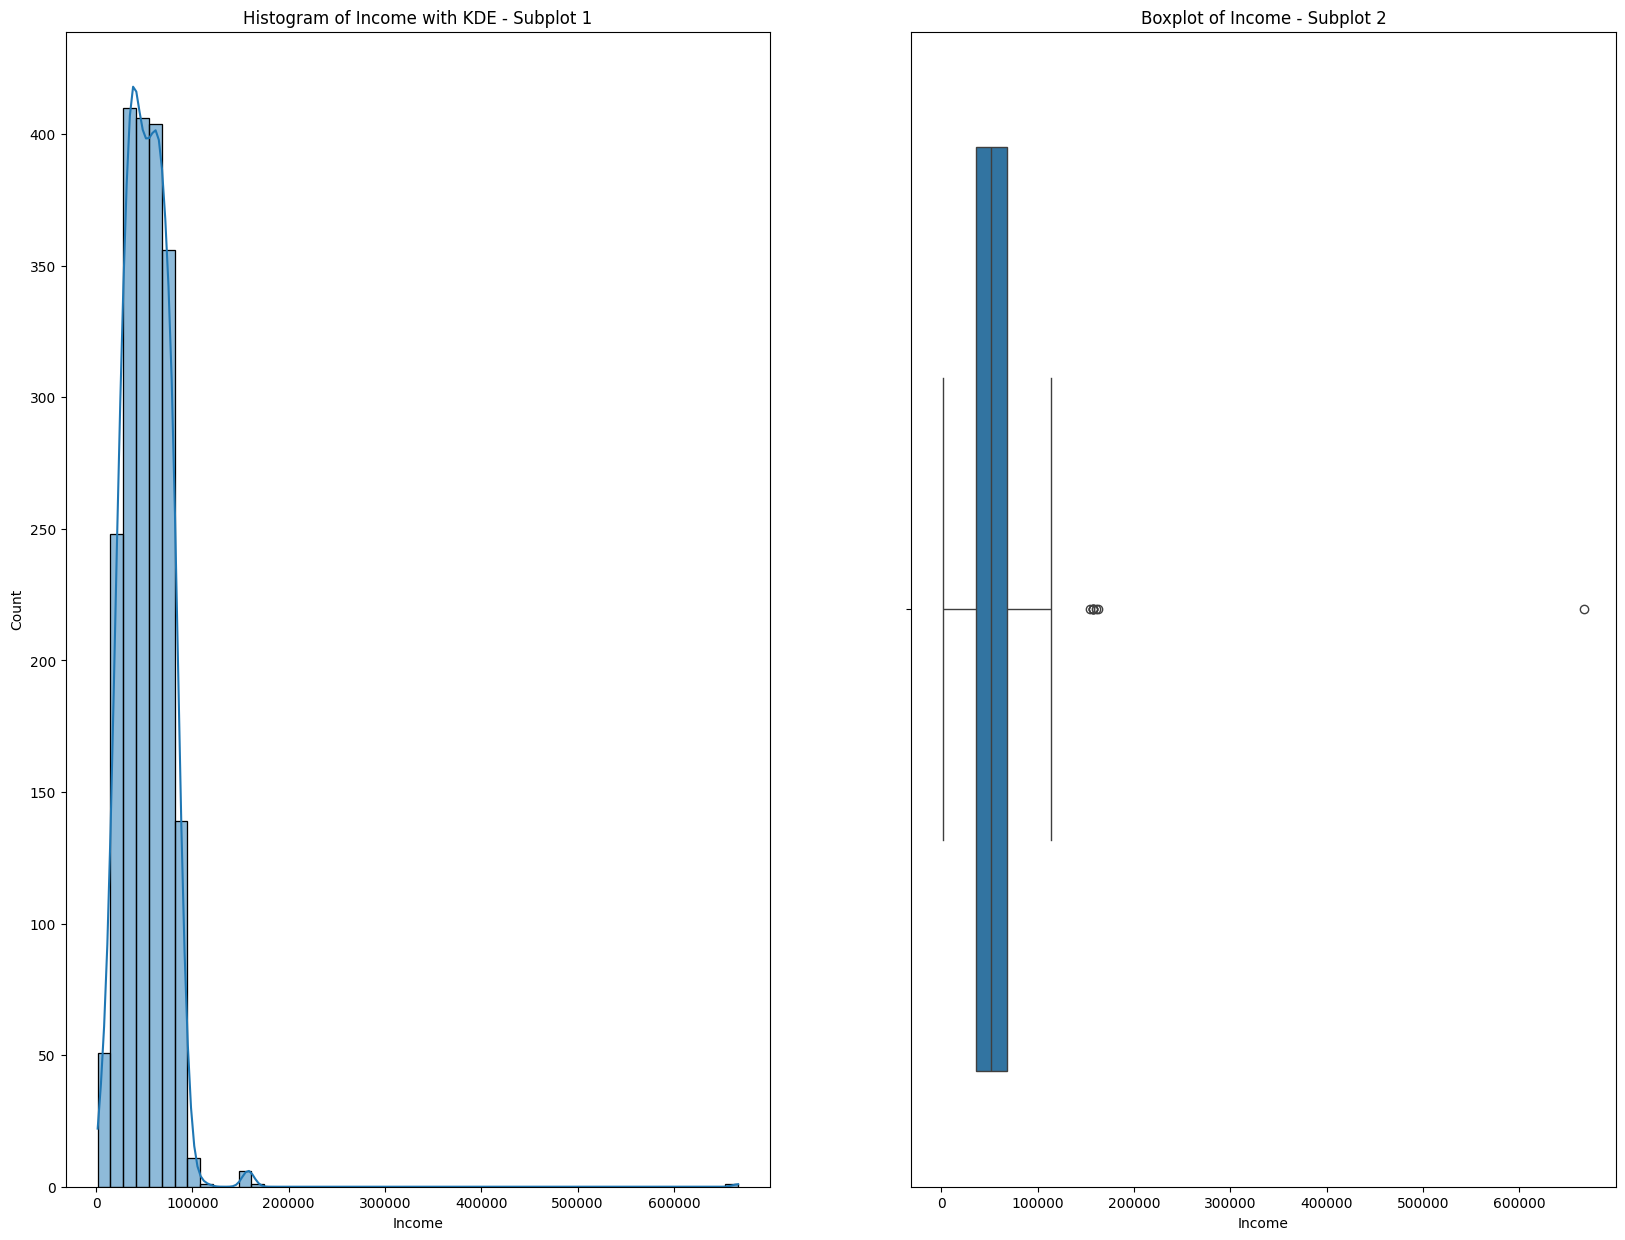

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
sns.histplot(data=df, x='Income', kde=True, bins=50, ax=axes[0])
axes[0].set_title('Histogram of Income with KDE - Subplot 1')
sns.boxplot(data=df, x='Income', ax=axes[1])
axes[1].set_title('Boxplot of Income - Subplot 2')
plt.show()

In [30]:
df['Income'].mode().iloc[0]

7500.0

In [31]:
df['Income'].describe()

count      2034.000000
mean      52357.791544
std       25526.956988
min        1730.000000
25%       35528.250000
50%       51533.000000
75%       68480.750000
max      666666.000000
Name: Income, dtype: float64

Di atas terdapat histogram plot dan boxplot yang merupakan plot dari distribusi kolom `Income`. Dari kedua plot tersebut dapat ditarik kesimpulan sebagai berikut:

- Histogram plot:
1. Mayoritas customer memiliki income pada rentang $40,000 hingga $70,000
2. Terlihat ada kenaikan jumlah customer pada rentang income $0 hingga puncaknya $50,000
3. Pada income lebih dari $50,000 terlihat adanya penurunan jumlah customer.

- Boxplot:
1. Dari keseluruhan customer ditarik income rata-rata $52,000 dan median $51,381
2. Berdasarkan nilai standar deviasi, maka mayoritas customer memiliki rentang usia bervariasi antara $25,000 hingga $77,000
3. Terdapat outliers, ditemukan beberapa customer memiliki income yang sangat besar.
4. Perlu dicari tahu mengapa ada penurunan jumlah customer yang signifikan setelah income $50,000? Apakah layanan yang diberikan tidak menarik bagi mereka yang memiliki income lebih besar?

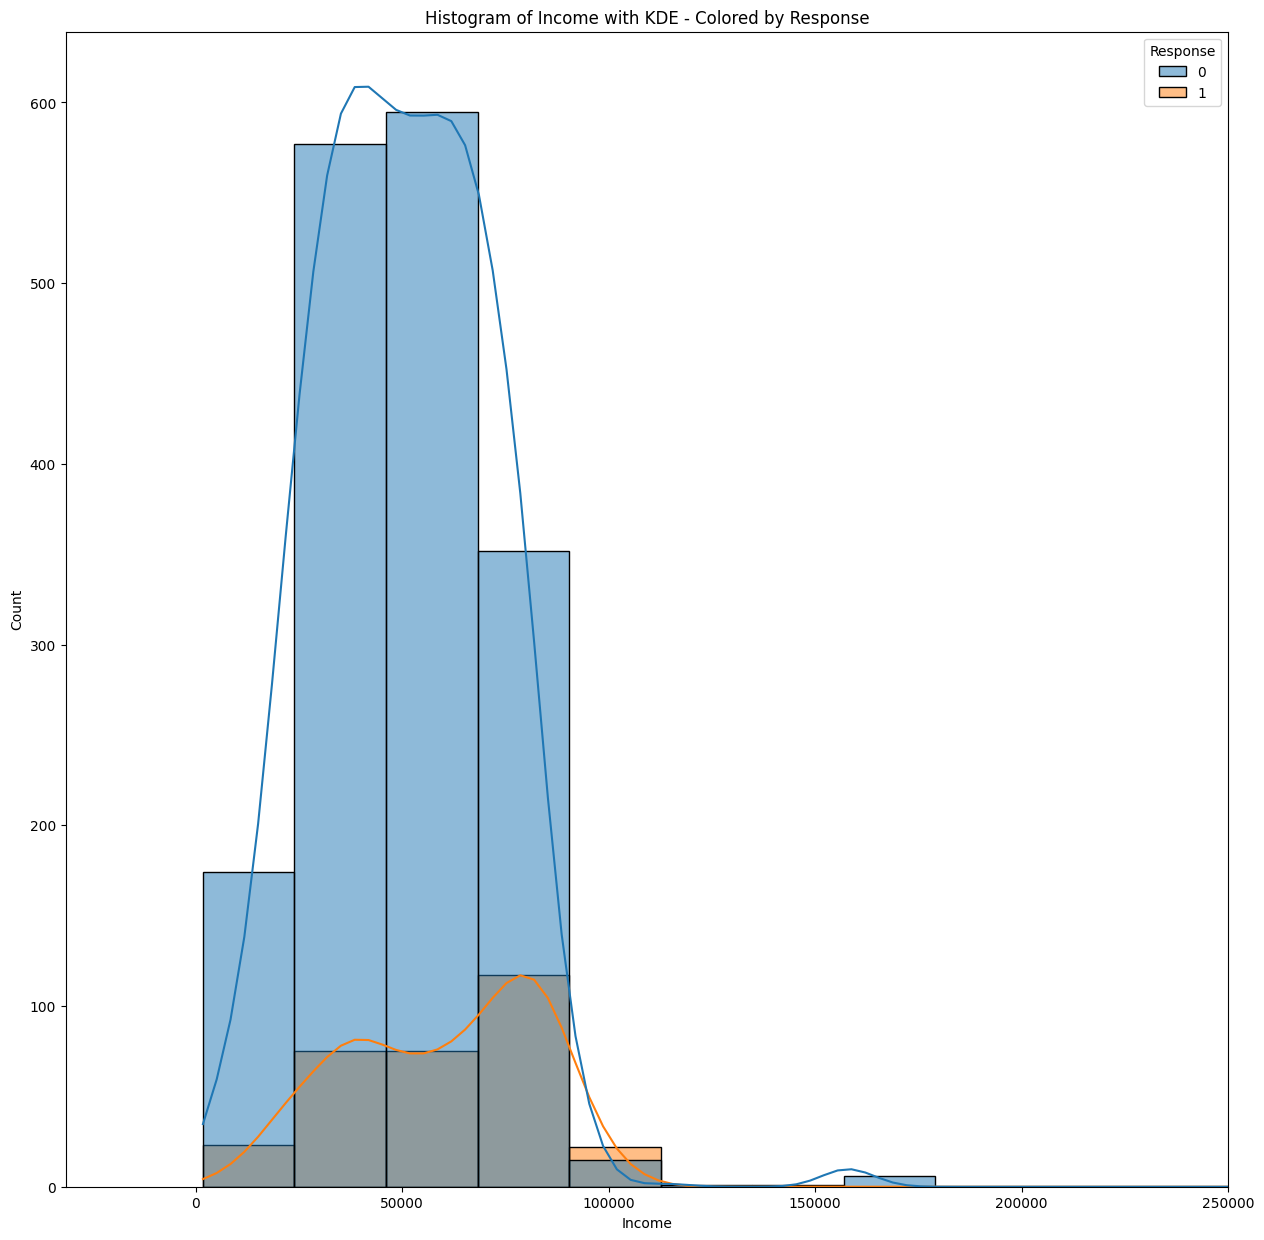

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.histplot(data=df, x='Income', kde=True, bins=30, hue='Response')
plt.xlim(right=250000)
plt.title('Histogram of Income with KDE - Colored by Response')
plt.show()

Pada plot di atas, saya set maximum $250,000 agar terpengaruhi nilai ekstrim. Dari plot tersebut dapat ditarik kesimpulan:
1. Jumlah persentase pengguna promo per kelompok income beranjak naik dengan puncaknya pada kelompok income ~$100,000 menandakan bahwa kelompok customer ini tertarik dengan promo campaign
2. Customer dengan income lebih besar dari $110,000 tidak tertarik dengan promo campaign dibuktikan dengan tren garis KDE yang menurun tajam hingga landai.

### 4.2.3 - Kolom `Recency`

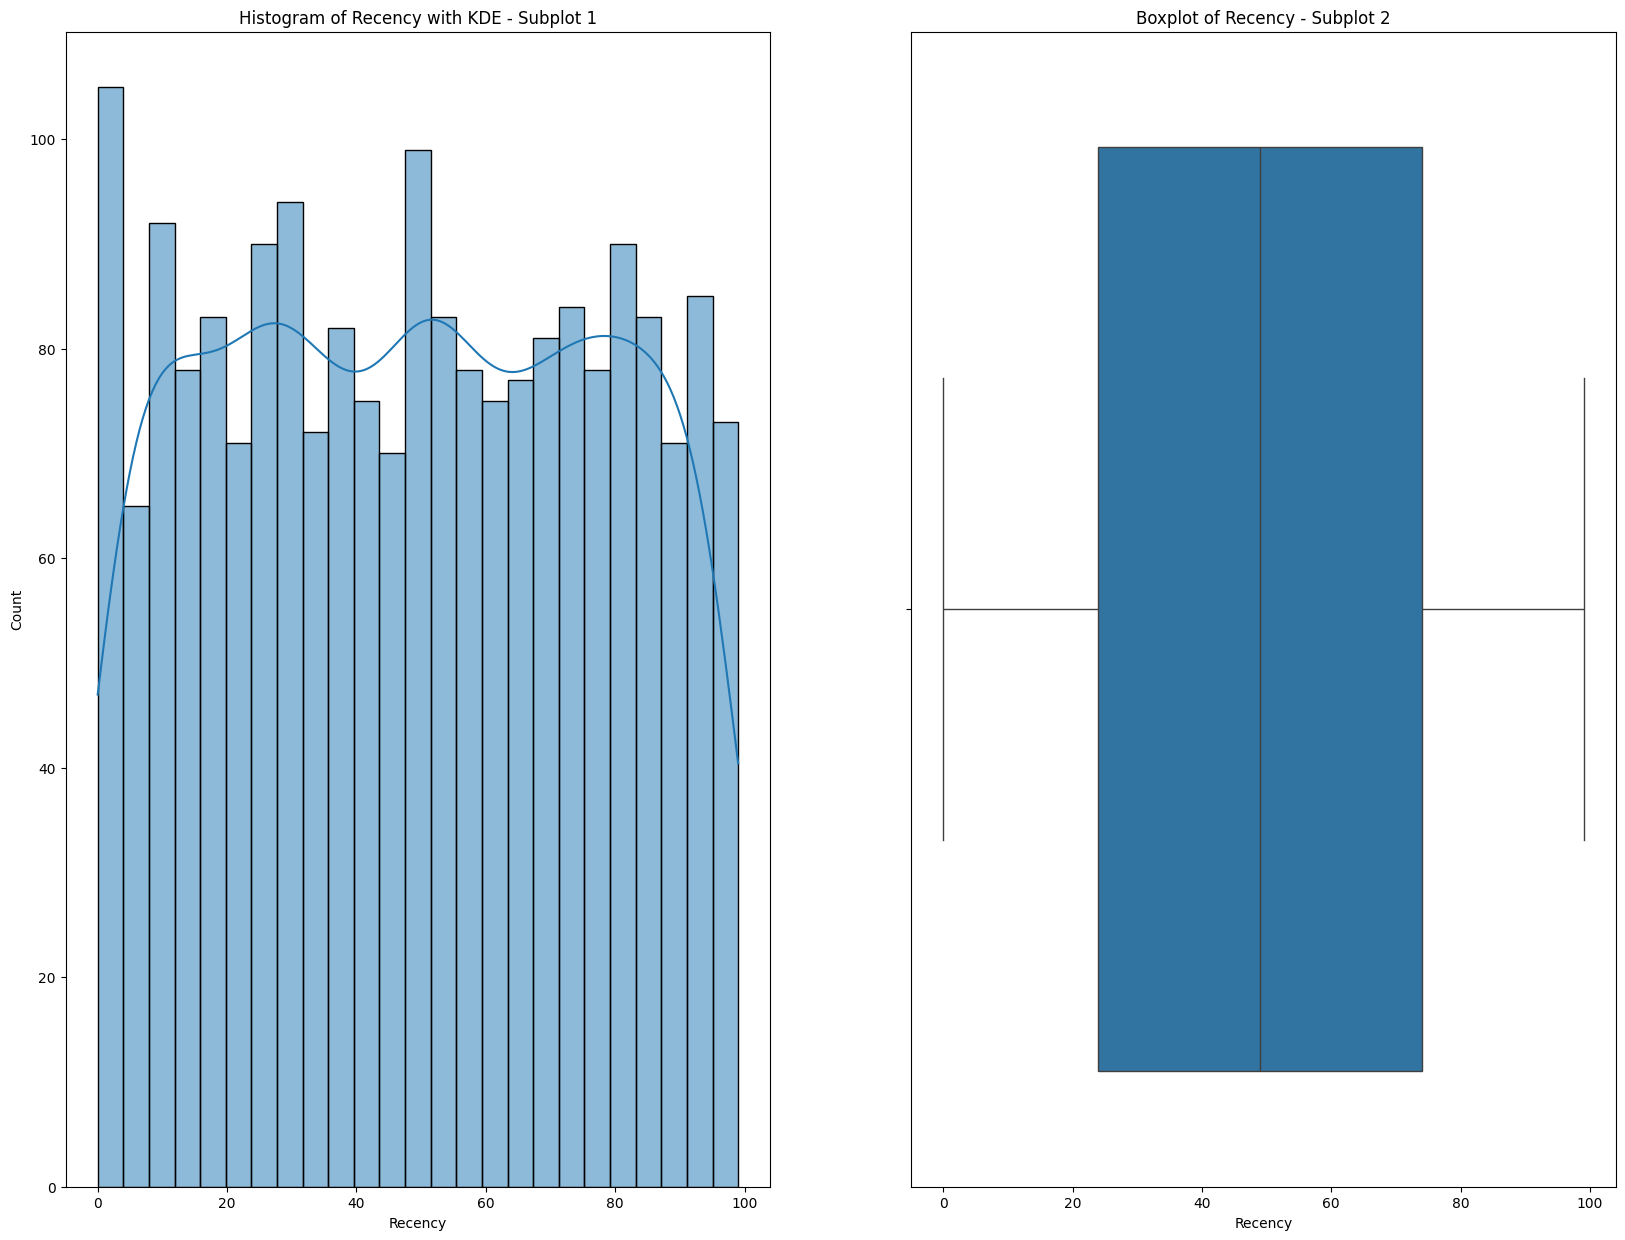

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))
sns.histplot(data=df, x='Recency', kde=True, bins=25, ax=axes[0])
axes[0].set_title('Histogram of Recency with KDE - Subplot 1')
sns.boxplot(data=df, x='Recency', ax=axes[1])
axes[1].set_title('Boxplot of Recency - Subplot 2')
plt.show()

In [34]:
df['Recency'].mode().iloc[0]

56

In [35]:
df['Recency'].describe()

count    2034.000000
mean       48.844641
std        28.983678
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Di atas terdapat histogram plot dan boxplot yang merupakan plot dari distribusi kolom `Recency`. Dari kedua plot tersebut dapat ditarik kesimpulan sebagai berikut:

- Histogram plot:
1. Histogram memberikan insight terkait distribusi dari `Recency`, mengindikasikan seberapa lama pembelian terakhir dari customer
2. Berdasarkan visualisasi bentuk dari distribusinya adalah simetris
3. Terlihat bahwa customer yang tidak berbelanja dalam 30 hari terakhir sangat banyak. Perlu dicari tahu rata-rata berapa hari yang diperlukan customer untuk belanja kembali agar menjadi indikator loyal customer.

- Boxplot:
1. Dari keseluruhan customer ditarik rata-rata tidak berbelanja selama 49 hari
2. Berdasarkan nilai standar deviasi, maka mayoritas customer memiliki rentang tidak berbelanja sekitar 21 hingga 77 hari

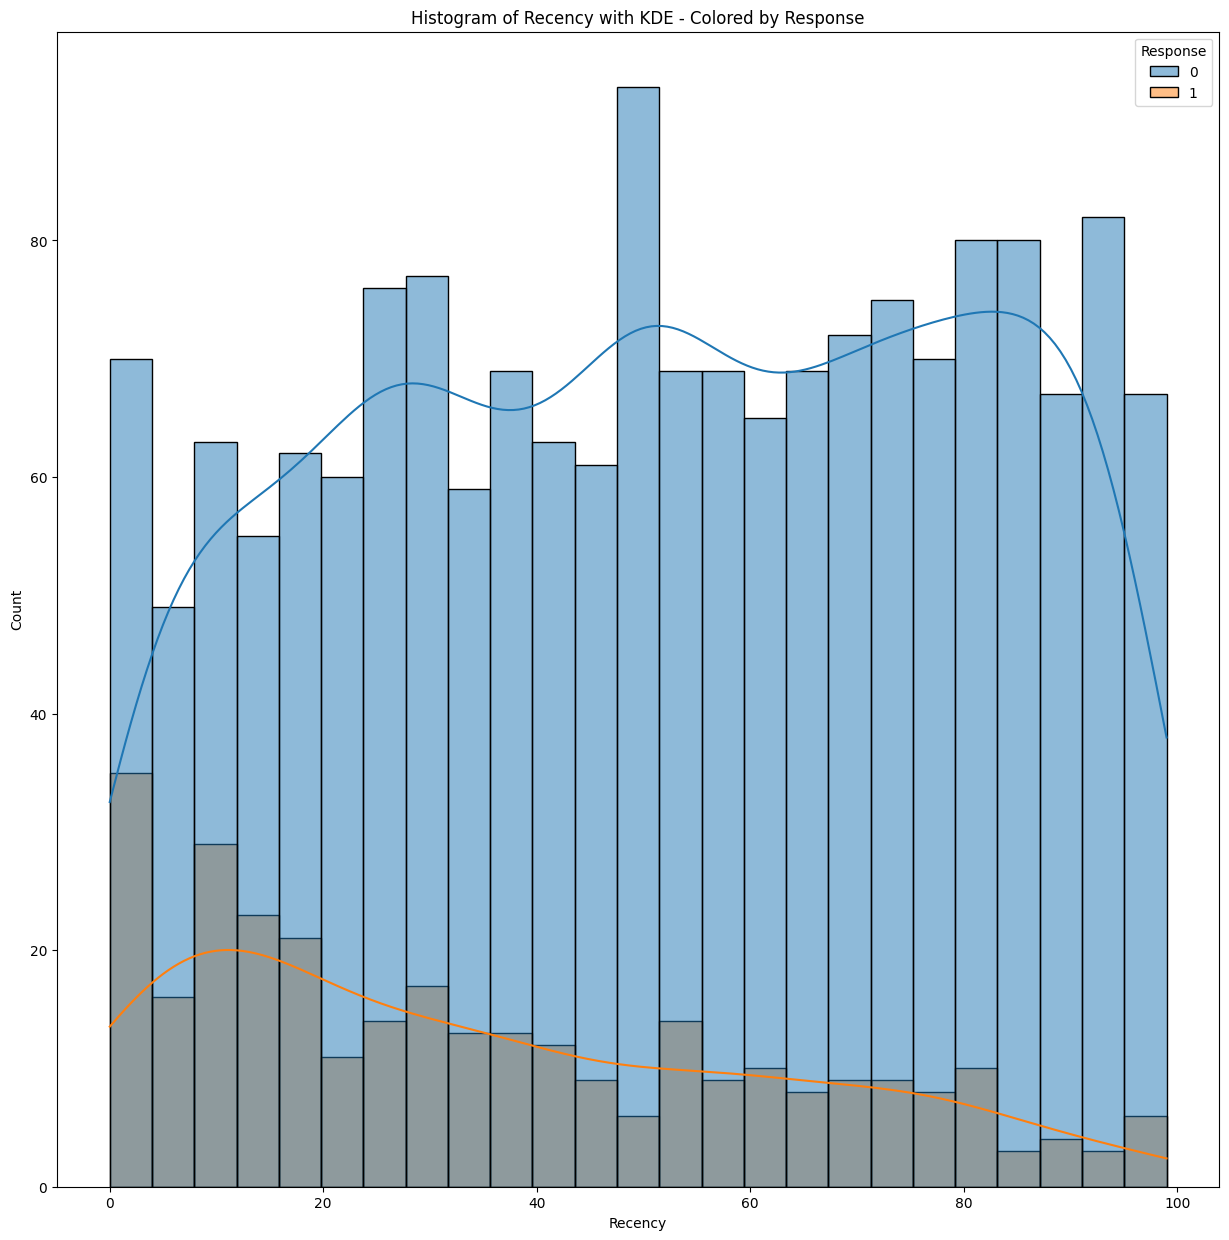

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.histplot(data=df, x='Recency', kde=True, bins=25, hue='Response')
plt.title('Histogram of Recency with KDE - Colored by Response')
plt.show()

Melalui plot histogram di atas dapat ditarik kesimpulan bahwa:
1. Semakin lama customer tidak berbelanja maka persentase campaign diterima semakin menurum
2. Customer yang lebih sering berbelanja lebih sering menggunakan promo campaign

### 4.2.4 - Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`

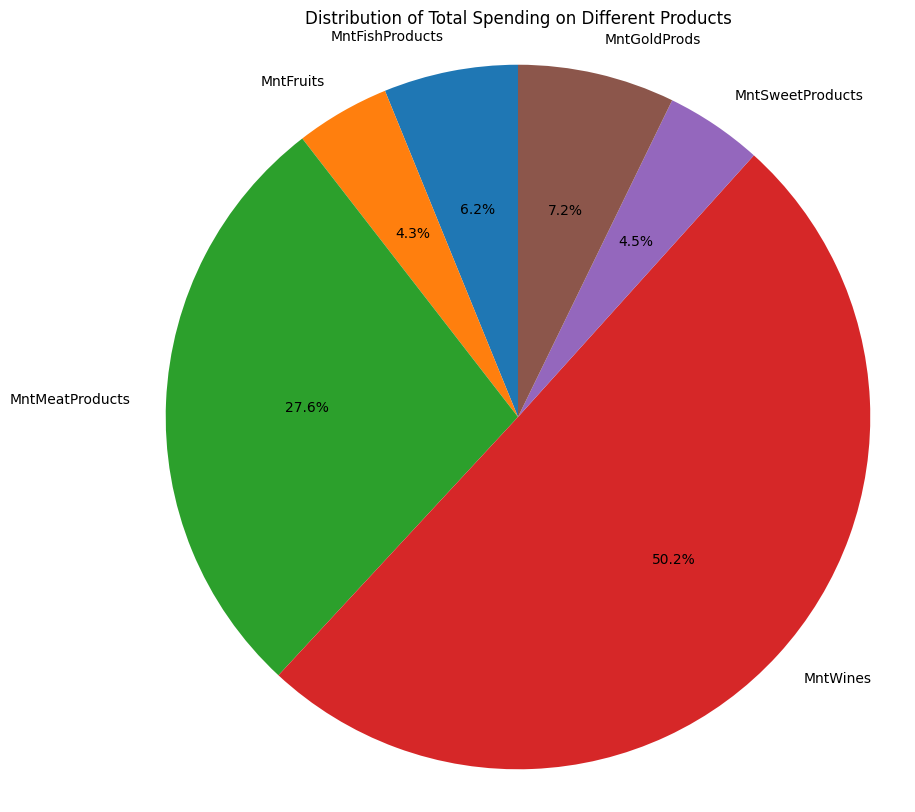

In [37]:
total_spending = df[['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal, ensuring that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Total Spending on Different Products')

# Show the pie chart
plt.show()

In [38]:
print('Amount spent of each products in the last 2 years = \n')
print(total_spending)
print('\nTotal amount spent in the last 2 years = ',total_spending.sum())

Amount spent of each products in the last 2 years = 

MntFishProducts      76172
MntFruits            53479
MntMeatProducts     341231
MntWines            620738
MntSweetProducts     55205
MntGoldProds         89109
dtype: int64

Total amount spent in the last 2 years =  1235934


Pie chart tersebut menggambarkan distribusi total pembelian customer selama 2 tahun terakhir dalam berbagai segmen produk. Dapat diambil kesimpulan sebagai berikut:

1. Produk dominan dengan penjualan tertinggi ialah produk-produk kategori Wine (50.2%), dan produk dengan penjualan tertinggi kedua ialah produk-produk kategori Meat (27.6%). Mengetahui bahwa semua customer adalah orang dewasa, maka hal ini normal.
2. Perlu dicari tahu apakah ada perbedaan dari pembelian customer terhadap kategori yang berbeda.
3. Ide promosi adalah dengan meningkatkan produk-produk kategori selain Wine dan Meat.
4. Perlu dicari tahu lebih lanjut mengenai preferensi customer, dari seluruh produk sekategori apakah produk-produk sekategori memiliki penjualan yang sama (tidak berbeda signifikan). 

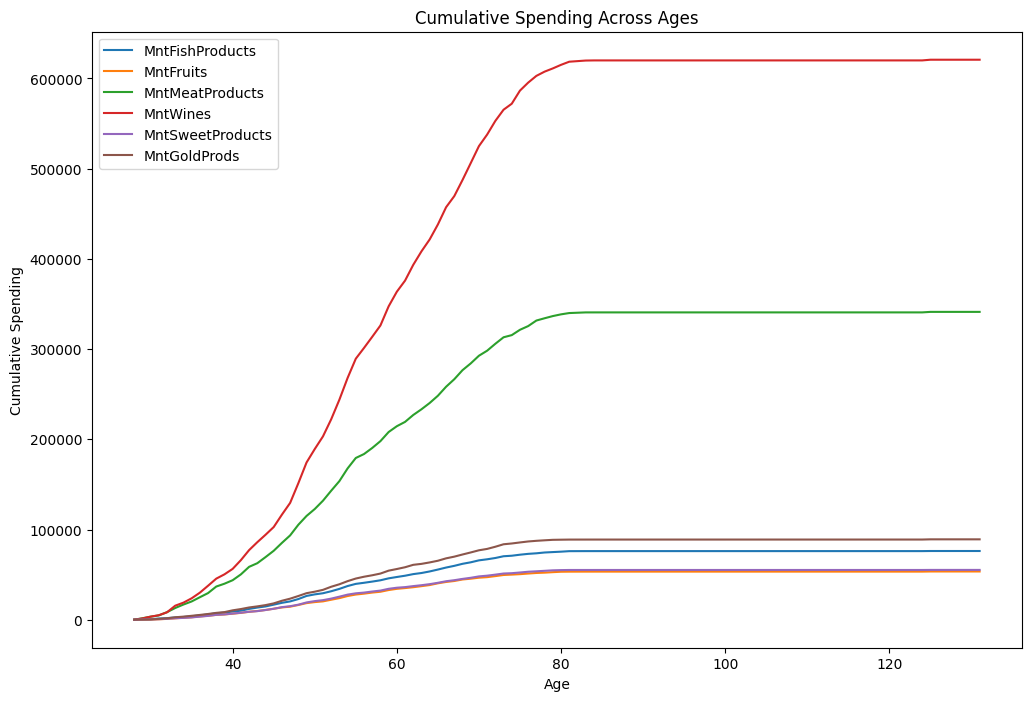

In [39]:
spending_columns = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Calculate cumulative spending for each age
cumulative_spending = df.groupby('Age')[spending_columns].sum().cumsum()

# Plotting
plt.figure(figsize=(12, 8))

for column in cumulative_spending.columns:
    plt.plot(cumulative_spending.index, cumulative_spending[column], label=column)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Cumulative Spending')
plt.title('Cumulative Spending Across Ages')
plt.legend()

# Show the plot
plt.show()

Melalui plot cumulative spending across ages dibuktikan bahwa:
1. Kelompok customer dengan rentang usia 45-70 memiliki spending yang terbesar diantara kelompok usia lain. Terbukti dari kenaikan garis yang signifikan.
2. Tren pembelian customer meningkat seiring meningkatnya usia hingga usia 70
3. Disarankan untuk memancing daya beli kelompok usia di bawah 45 tahun.


### 4.2.5 - Kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`

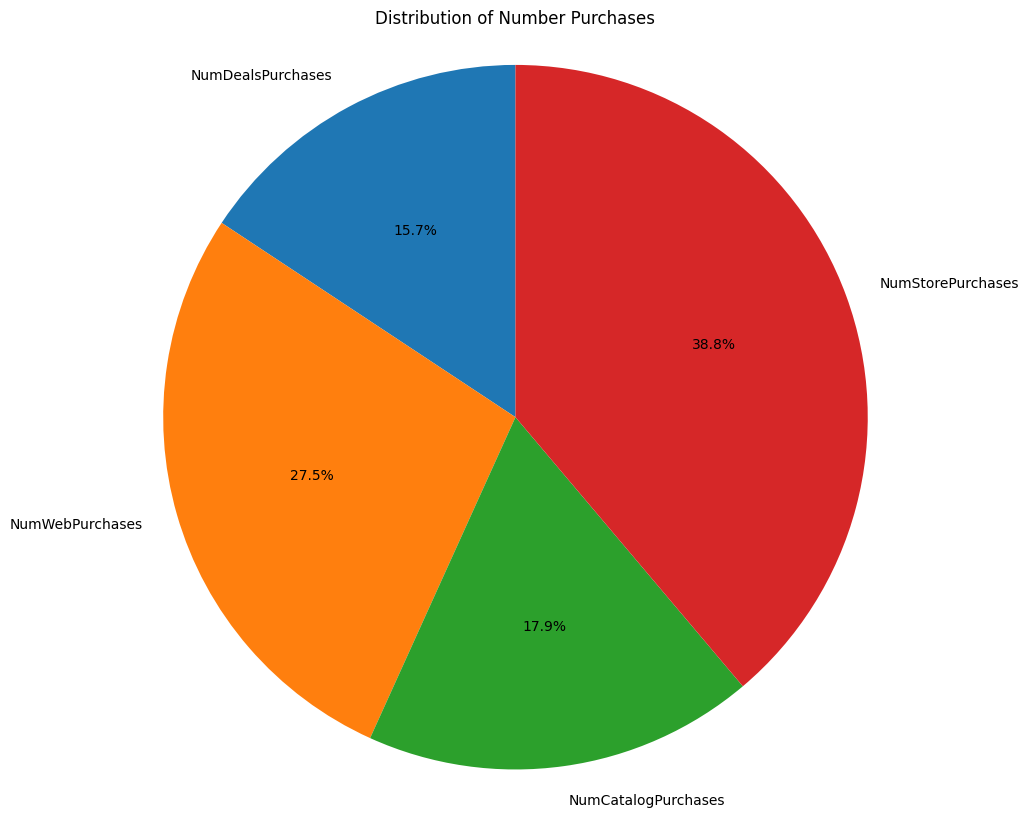

In [40]:
total_num_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_num_purchases, labels=total_num_purchases.index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal, ensuring that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Number Purchases')

# Show the pie chart
plt.show()

In [41]:
print('Number of purchases in the last 2 years = \n')
print(total_num_purchases)
print('\nTotal number of purchases in the last 2 years = ',total_num_purchases.sum())

Number of purchases in the last 2 years = 

NumDealsPurchases       4755
NumWebPurchases         8338
NumCatalogPurchases     5432
NumStorePurchases      11761
dtype: int64

Total number of purchases in the last 2 years =  30286


Pie chart tersebut menggambarkan distribusi jumlah transaksi customer selama 2 tahun terakhir. Dapat diambil kesimpulan sebagai berikut:

1. Pembelian terbanyak melalui pembelian langsung ke toko, sedangkan jumlah transaksi kedua terbanyak ialah pembelian melalui website. Dapat disimpulkan bahwa customer telah melek teknologi mengingat customer kebanyak berusia dewasa.
2. NumDealsPurchases hanya 15.7% sama dengan persentase `Response` accepted juga 15%
3. NumCatalogPurchases menduduki posisi terakhir dalam cara pembelian. Mungkin dikarenakan lebih mudah belanja melalui website atau datang ke toko langsung.

## 4.3 - Kolom Kategorik

### 4.3.1 - Kolom `Education`

In [49]:
target_ed = df["Education"].value_counts().reset_index()
persen_ed = df["Education"].value_counts(normalize=True).reset_index()
target_ed["percentage"] = persen_ed["proportion"]
target_ed

,Education,count,percentage
0,Graduation,1019,0.500983
1,PhD,445,0.218781
2,Master,336,0.165192
3,2n Cycle,185,0.090954
4,Basic,49,0.024090


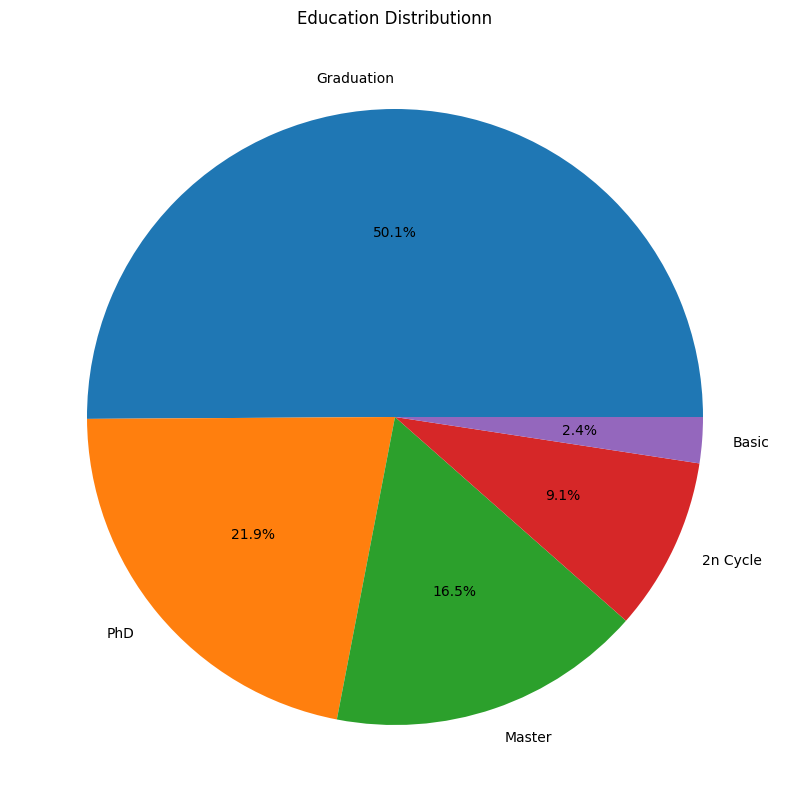

In [52]:
plt.figure(figsize=(10, 10))
plt.pie(x = df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Education Distributionn")
plt.show()

Dari pie chart Education Distribution di atas dapat ditarik kesimpulan sebagai berikut:
1. Customer terbanyak ialah lulusan S1 dengan proporsi 50.1%, disusul oleh lulusan S2 (Master dan 2n Cycle setara) dengan proporsi 25.6%, lalu penerima PhD sebesar 21.9% dan Basic education 2.4%
2. Berdasarkan mayoritas dari customer telah lulus dari perguruan tinggi maka dapat ditarik kesimpulan bahwa customer memiliki kemampuan memahami dan berpikir yang membuat customer menjadi konsumen pintar. Oleh sebab itu, produk-produk dan promosi yang ditawarkan harusnya yang menguntungkan bagi customer, jika dirasa merugikan customer maka customer akan menjauhi produk dan promosi tersebut.

<Figure size 1200x800 with 0 Axes>

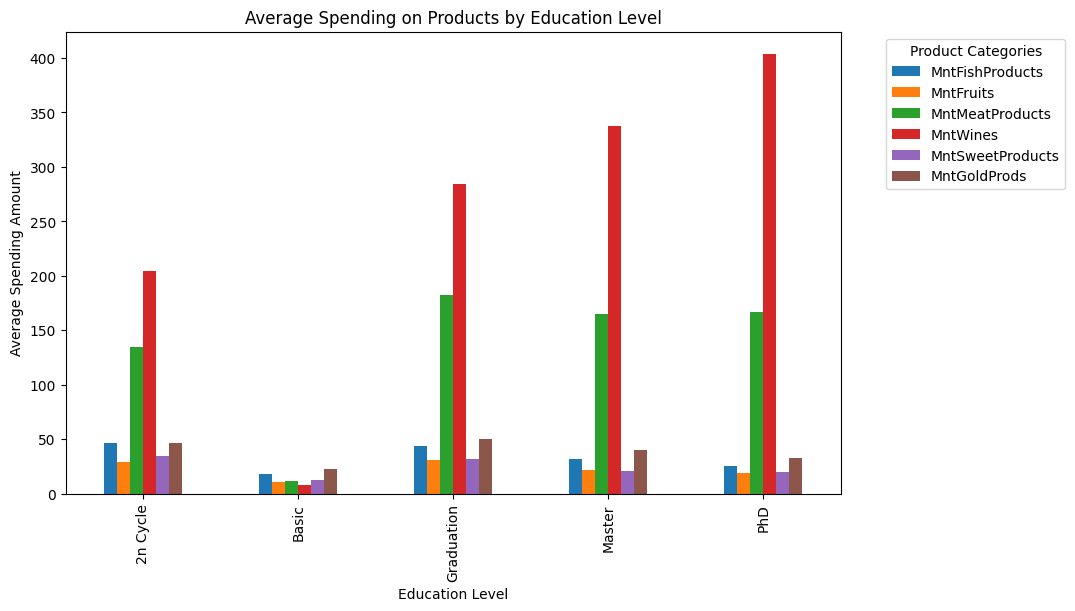

In [108]:
# Calculate cumulative spending for each education
mean_spending_edu = df.groupby('Education')[spending_columns].mean()

# Plotting
plt.figure(figsize=(12, 8))

columns_to_plot = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_spending_edu[columns_to_plot].plot(kind='bar', ax=ax)

plt.title('Average Spending on Products by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending Amount')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Berdasarkan plot di atas dapat ditarik kesimpulan sebagai berikut:
1. Rata-rata pembelian customer meningkat seiring dengan peningkatan tingkat edukasional.
2. Tiap kategori produk memiliki tren kepada masing-masing kelompok customer

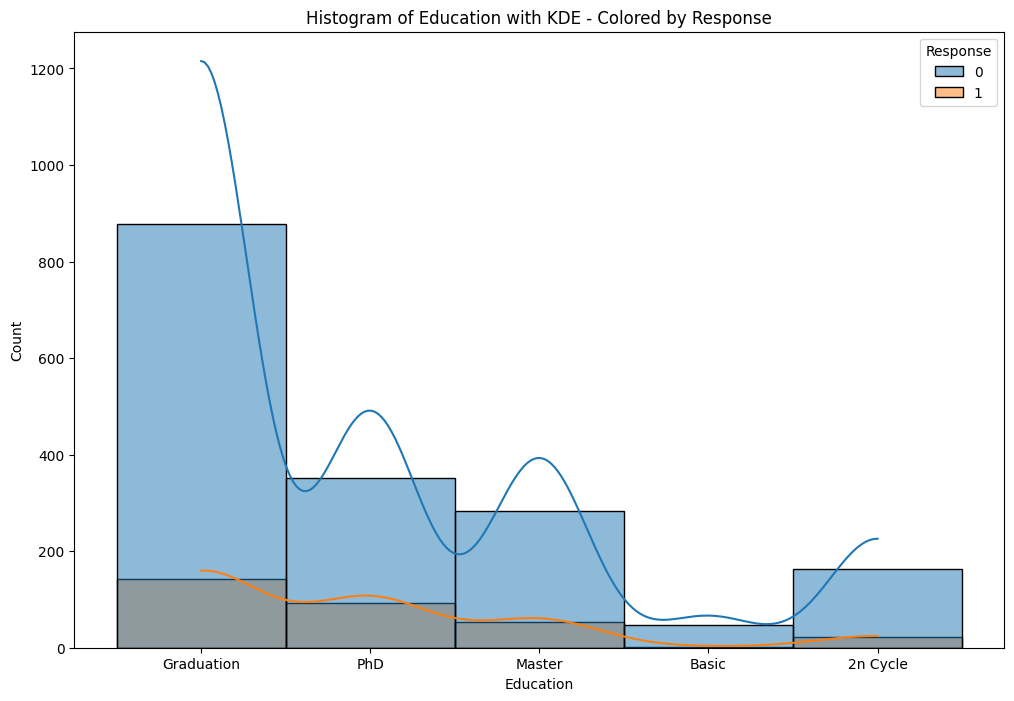

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(data=df, x='Education', kde=True, hue='Response')
plt.title('Histogram of Education with KDE - Colored by Response')
plt.show()

Berdasarkan tingkat edukasi dan response ditarik kesimpulan yaitu:
1. Semakin tinggi tingkat edukasi maka rasio penerimaan offer campaign naik.

### 4.3.2 - Kolom `Marital_Status`

In [104]:
target_marital = df["Marital_Status"].value_counts().reset_index()
target_marital = df["Marital_Status"].value_counts(normalize=True).reset_index()
target_marital

,Marital_Status,proportion
0,Married,0.387414
1,Together,0.252704
2,Single,0.215831
3,Divorced,0.106195
4,Widow,0.034415
5,Alone,0.001475
6,Absurd,0.000983
7,YOLO,0.000983


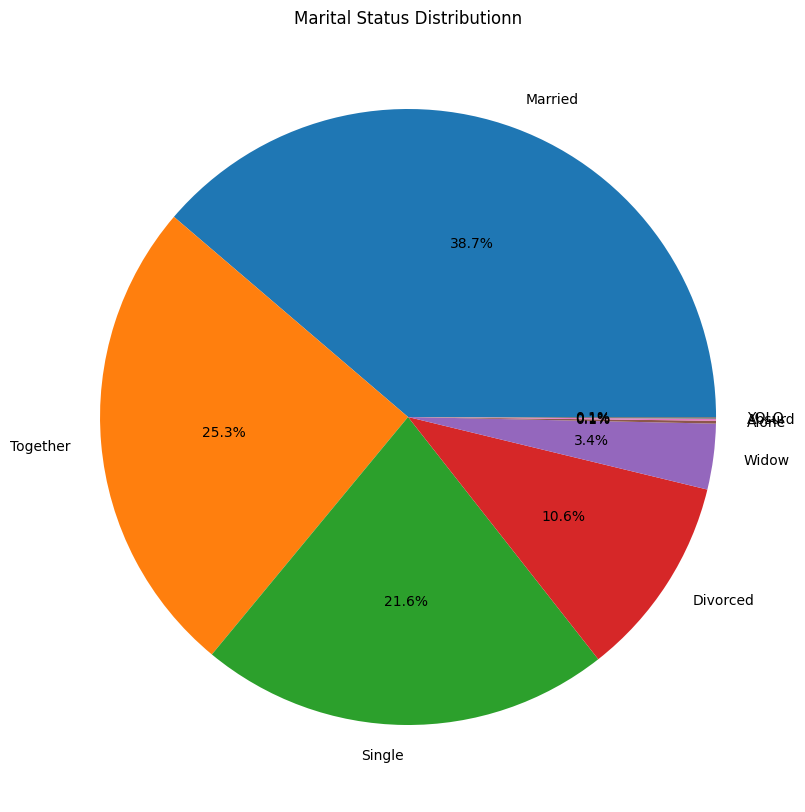

In [54]:
plt.figure(figsize=(10, 10))
plt.pie(x = df['Marital_Status'].value_counts(), labels = df['Marital_Status'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Marital Status Distributionn")
plt.show()

Berdasarkan data kolom `Marital_Status` ada beberapa value unik yang dapat dikelompokkan ke value lain karena memiliki makna kembar, seperti Married dan Together, Single dan Alone dan Yolo dan Absurd, Divorced dan Widow. Dari pie chart tersebut dapat ditarik kesimpulan:
1. Customer utama ialah yang memiliki status Married dan Together dengan total persentase mencapai 64% disusul oleh Single yaitu 21.5%. Lalu kelompok customer Divorced maupun Widow di posisi terakhir 14%.

<Figure size 1200x800 with 0 Axes>

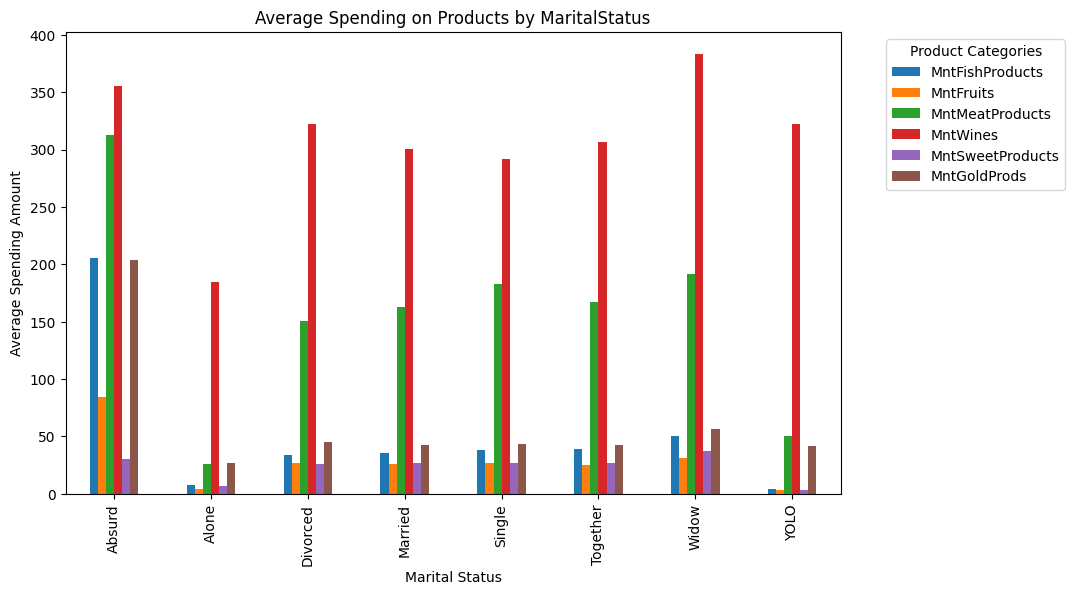

In [95]:
# Calculate cumulative spending for each Marital_Status
nean_spending_mart = df.groupby('Marital_Status')[spending_columns].mean()

# Plotting
plt.figure(figsize=(12, 8))

columns_to_plot = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
nean_spending_mart[columns_to_plot].plot(kind='bar', ax=ax)

plt.title('Average Spending on Products by MaritalStatus')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending Amount')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Kesimpulan:
1. Hampir seluruh kelompok marital status memiliki pola yang sama dalam rata-rata pembelian produk, terkecuali kelompok Absurd, Alone, dan YOLO.

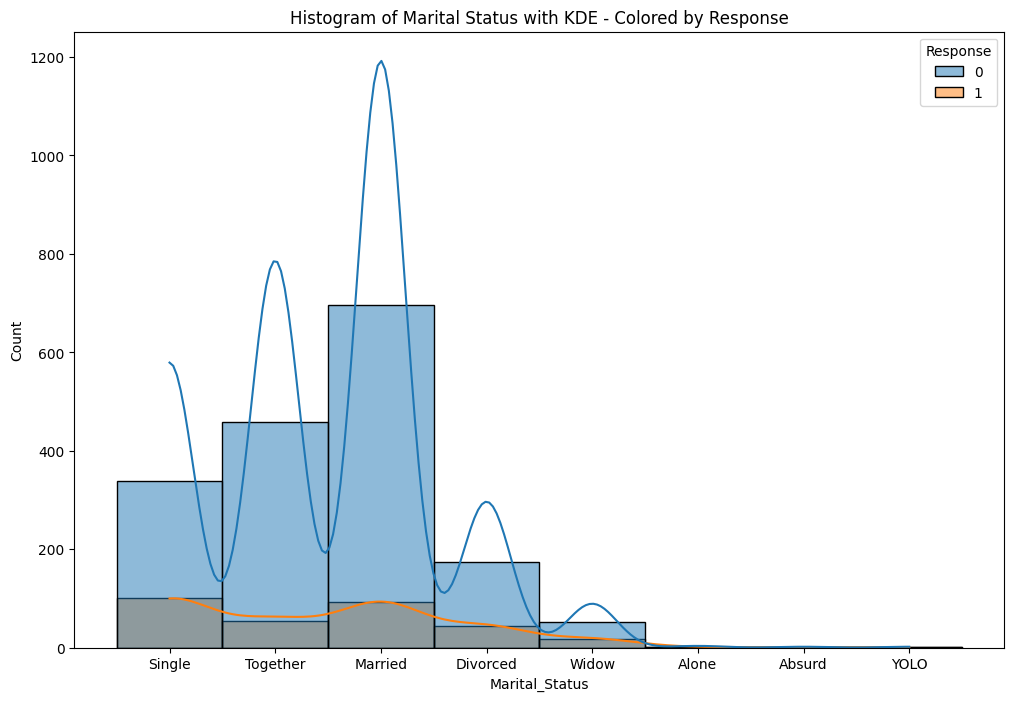

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(data=df, x='Marital_Status', kde=True, hue='Response')
plt.title('Histogram of Marital Status with KDE - Colored by Response')
plt.show()

Kesimpulan:
1. Kelompok Single dan Married merupakan kelompok yang paling banyak menerima promo campaign.
2. Secara rasio penerima promo campaign kelompok Single, Divorced, dan Widow memiliki rasio yang lebih besar dibandingkan kelompok lainnya. 

### 4.3.3 - Kolom `Kidhome`, dan `Teenhome`

In [103]:
target_kidhome = df["Kidhome"].value_counts().reset_index()
target_kidhome = df["Kidhome"].value_counts(normalize=True).reset_index()
target_kidhome

,Kidhome,proportion
0,0,0.577188
1,1,0.402655
2,2,0.020157


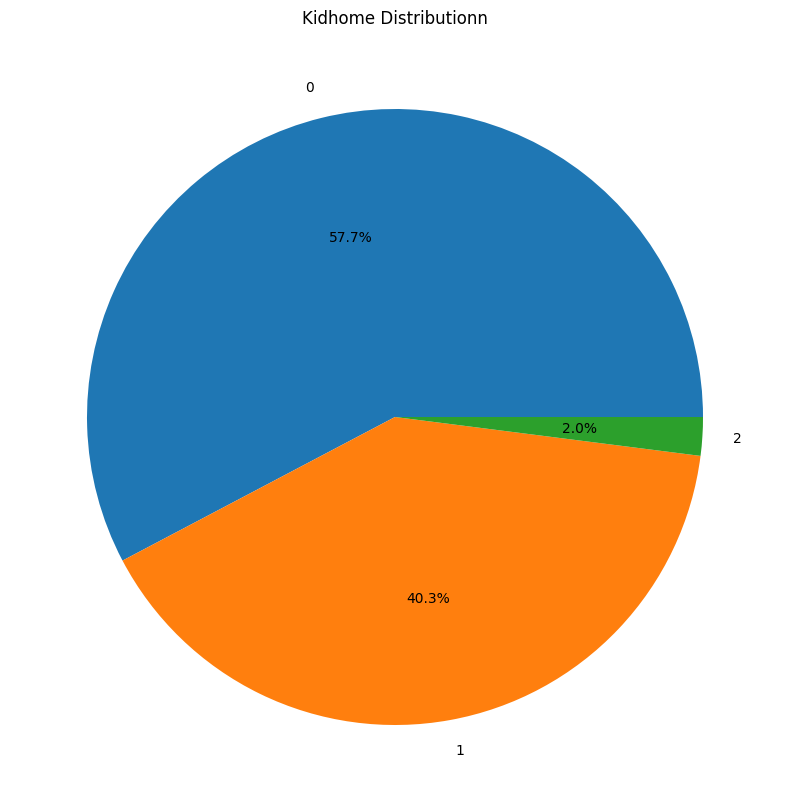

In [107]:
plt.figure(figsize=(10, 10))
plt.pie(x = df['Kidhome'].value_counts(), labels = df['Kidhome'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Kidhome Distributionn")
plt.show()

<Figure size 1200x800 with 0 Axes>

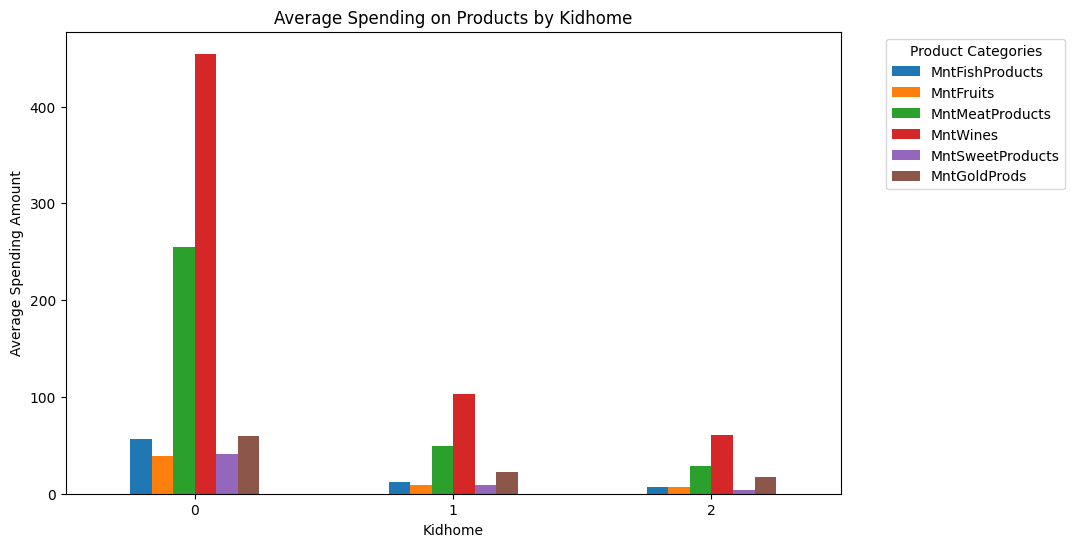

In [112]:
# Calculate cumulative spending for each Kidhome
mean_spending_edu = df.groupby('Kidhome')[spending_columns].mean()

# Plotting
plt.figure(figsize=(12, 8))

columns_to_plot = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_spending_edu[columns_to_plot].plot(kind='bar', ax=ax)

plt.title('Average Spending on Products by Kidhome')
plt.xlabel('Kidhome')
plt.xticks(rotation = 0)
plt.ylabel('Average Spending Amount')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Kesimpulan:
1. Semakin sedikit jumlah anak bocah yang dimiliki customer maka semakin tinggi rata-rata pembeliannya.
2. Dapat disimpulkan bahwa iFood tidak menarik bagi customer yang memiliki anak bocah.

Saran:
1. Memperluas market dengan menelusuri customer yang memiliki anak bocah

In [102]:
target_teenhome = df["Teenhome"].value_counts().reset_index()
target_teenhome = df["Teenhome"].value_counts(normalize=True).reset_index()
target_teenhome

,Teenhome,proportion
0,0,0.515733
1,1,0.460177
2,2,0.024090


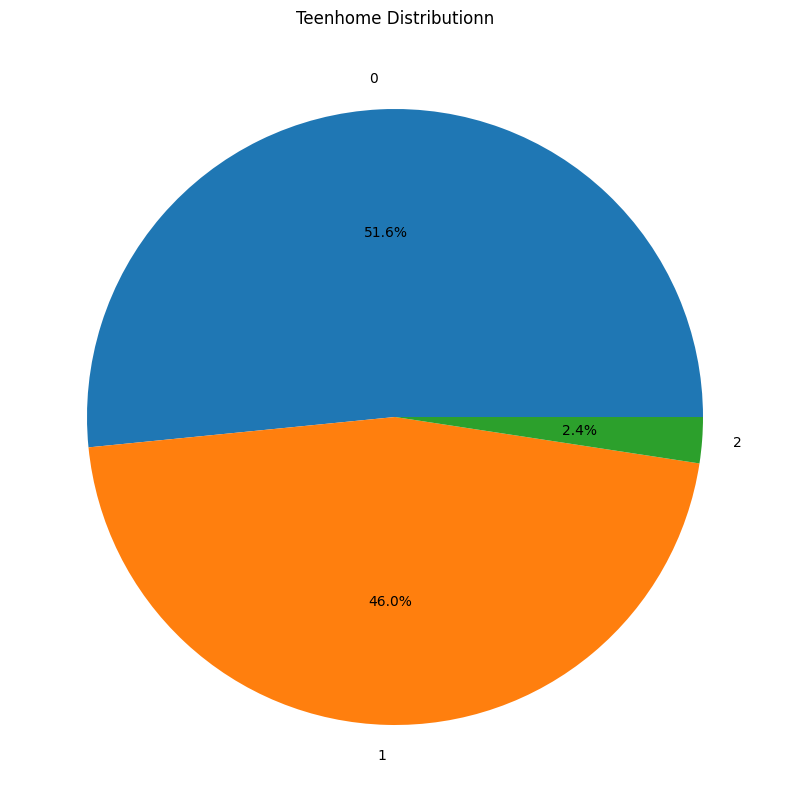

In [106]:
plt.figure(figsize=(10, 10))
plt.pie(x = df['Teenhome'].value_counts(), labels = df['Teenhome'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Teenhome Distributionn")
plt.show()

<Figure size 1200x800 with 0 Axes>

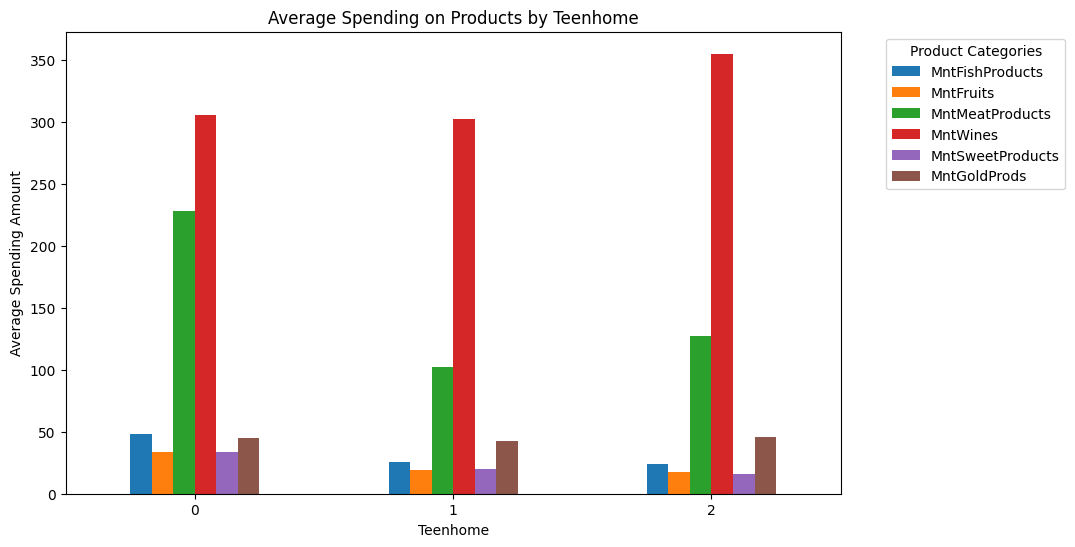

In [111]:
# Calculate cumulative spending for each Teenhome
mean_spending_edu = df.groupby('Teenhome')[spending_columns].mean()

# Plotting
plt.figure(figsize=(12, 8))

columns_to_plot = ['MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntWines', 'MntSweetProducts', 'MntGoldProds']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_spending_edu[columns_to_plot].plot(kind='bar', ax=ax)

plt.title('Average Spending on Products by Teenhome')
plt.xlabel('Teenhome')
plt.xticks(rotation = 0)
plt.ylabel('Average Spending Amount')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Show the plot
plt.show()

Kesimpulan:
1. Ditemukan anomali, mengapa customer yang tidak memiliki anak remaja malah semakin tinggi rata-rata pembelian produk daging dibandingkan yang memiliki anak remaja 1 atau 2.

Saran:
1. Mencari tahu mengapa semakin banyak anak maka rata-rata pembelian menurun.

### 4.3.4 - Kolom `Complain`

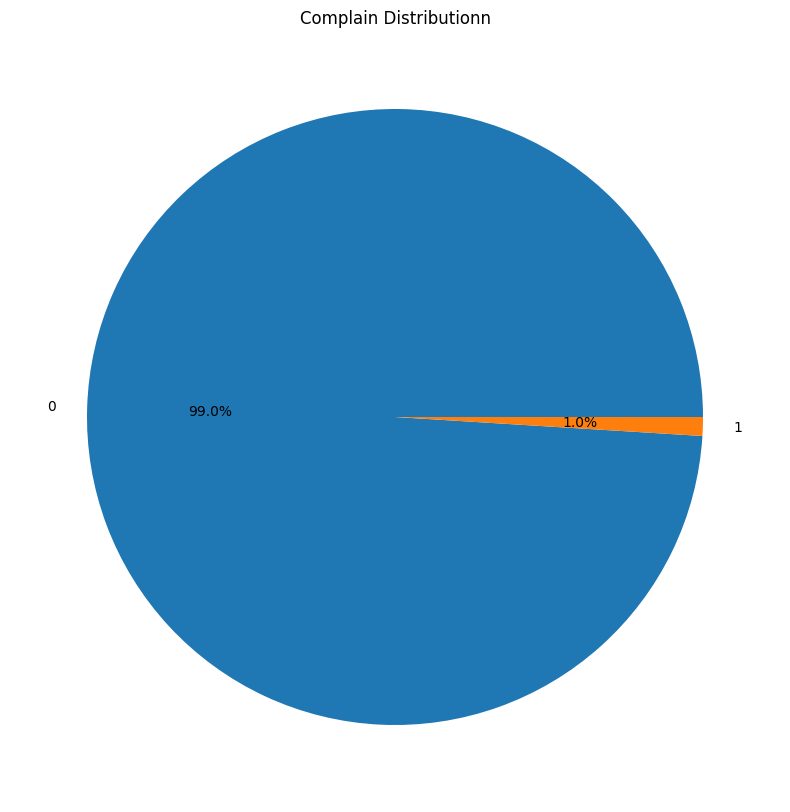

In [113]:
plt.figure(figsize=(10, 10))
plt.pie(x = df['Complain'].value_counts(), labels = df['Complain'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Complain Distributionn")
plt.show()

Kesimpulan:
1. Kinerja toko sudah baik, persentase customer yang komplain hanya sedikit hanya 1%

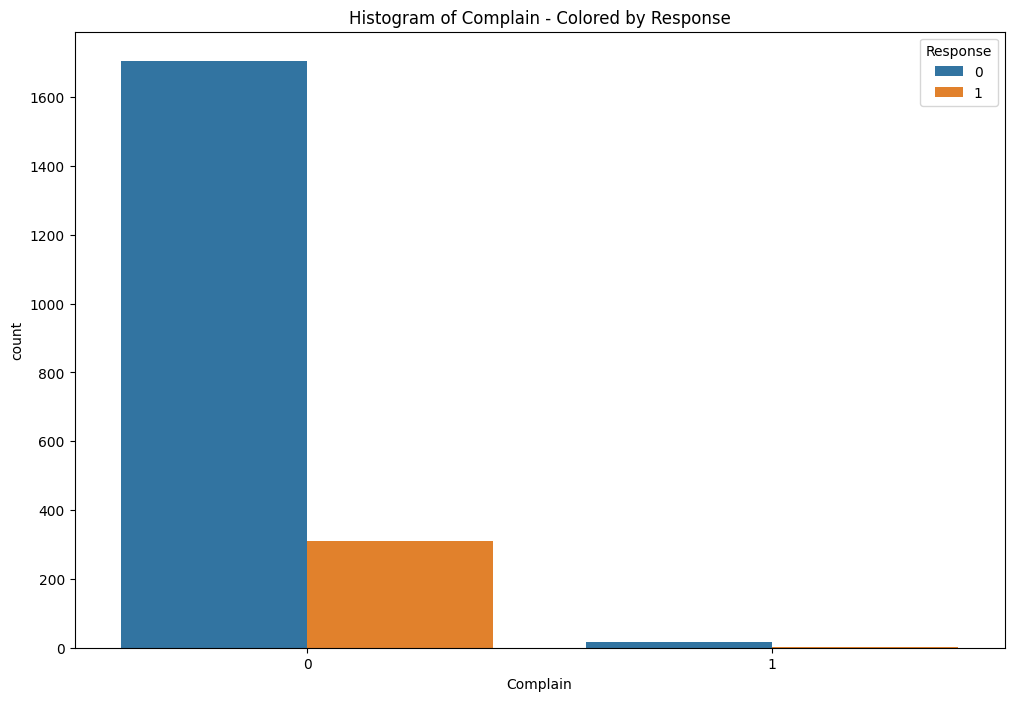

In [119]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df, x='Complain', hue='Response')
plt.title('Countplot of Complain - Colored by Response')
plt.show()

Tidak dapat menarik kesimpulan sebab perbandingan customer yang complain dan yang tidak complain timpang.

### 4.3.5 - Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, dan `AcceptedCmp5`

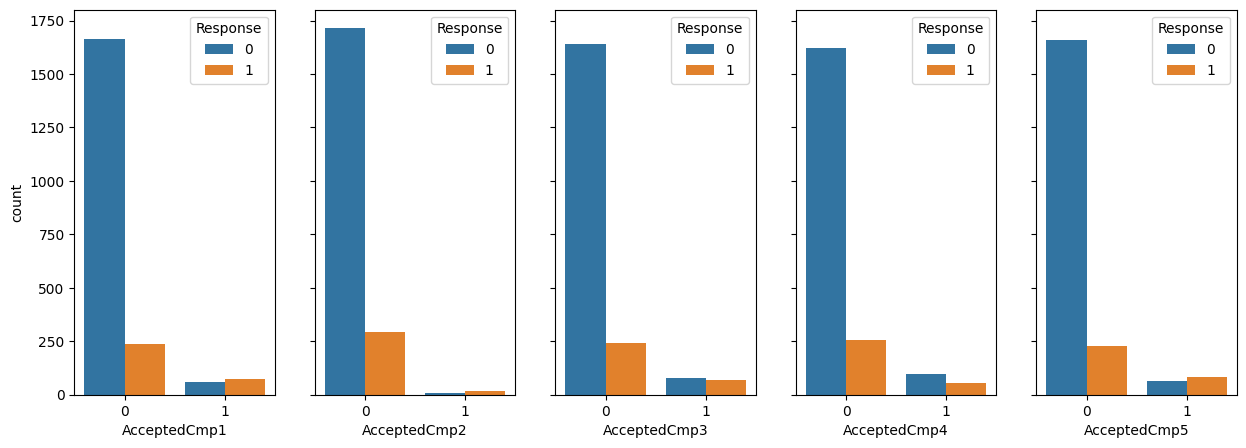

                    Count  Percentage
Campaign     Value                   
AcceptedCmp1 0       1901   93.461160
             1        133    6.538840
AcceptedCmp2 0       2008   98.721731
             1         26    1.278269
AcceptedCmp3 0       1883   92.576205
             1        151    7.423795
AcceptedCmp4 0       1879   92.379548
             1        155    7.620452
AcceptedCmp5 0       1887   92.772861
             1        147    7.227139


In [120]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

sns.countplot(x="AcceptedCmp1",hue=df['Response'],data=df, ax=axes[0])
sns.countplot(x="AcceptedCmp2",hue=df['Response'], data=df, ax=axes[1])
sns.countplot(x="AcceptedCmp3",hue=df['Response'], data=df, ax=axes[2])
sns.countplot(x="AcceptedCmp4",hue=df['Response'], data=df, ax=axes[3])
sns.countplot(x="AcceptedCmp5",hue=df['Response'], data=df, ax=axes[4])

plt.show()

cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Initialize an empty DataFrame to store the summary
summary_table = pd.DataFrame()

# Iterate over each AcceptedCmp column
for cmp_column in cmp_columns:
    # Count values
    counts = df[cmp_column].value_counts()
    # Calculate percentages
    percentages = df[cmp_column].value_counts(normalize=True) * 100
    # Combine counts and percentages into a single DataFrame
    cmp_summary = pd.concat([counts, percentages], axis=1)
    # Rename columns
    cmp_summary.columns = ['Count', 'Percentage']
    # Add a level for the AcceptedCmp column
    cmp_summary.index = pd.MultiIndex.from_product([[cmp_column], cmp_summary.index], names=['Campaign', 'Value'])
    # Append to the summary table
    summary_table = pd.concat([summary_table, cmp_summary])

# Display the summary table
print(summary_table)

Kesimpulan:
1. Campaign 2 merupakan promosi dengan tingkat kesuksesan terendah sebesar 1.27%
2. Rata-rata campaign yang diterima hanya sebesar 6.012%
3. Campaign dengan kesuksesan tertinggi adalah campaign 3, 4, dan 5
4. Customer yang accept campaign 1 hingga 5 memiliki rasio penerimaan campaign 6 lebih besar dibandingkan customer yang tidak accept campaign 1 hingga 5

## 4.4 - Korelasi Terhadap Kolom `Response`

### 4.4.1 - Kolom Numerik

Menggunakan Kendalls sebab input data merupakan data numerik dan output data adalah data kategorik.


In [44]:
num_col = ['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for col in num_col:
    corr_tau, pval_k = stats.kendalltau(df[col], df['Response'])
    print("Korelasi Response dengan",col)
    print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}\n")

Korelasi Response dengan Year_Birth
tau-correlation: 0.02, p-value: 0.24524823598394152

Korelasi Response dengan Income
tau-correlation: 0.13, p-value: 4.545470644980928e-13

Korelasi Response dengan Recency
tau-correlation: -0.17, p-value: 3.219745791134469e-20

Korelasi Response dengan MntWines
tau-correlation: 0.16, p-value: 3.536950153920473e-18

Korelasi Response dengan MntFruits
tau-correlation: 0.12, p-value: 4.0924012467355975e-11

Korelasi Response dengan MntMeatProducts
tau-correlation: 0.18, p-value: 2.6813914010287054e-23

Korelasi Response dengan MntFishProducts
tau-correlation: 0.09, p-value: 4.649823839937091e-07

Korelasi Response dengan MntSweetProducts
tau-correlation: 0.11, p-value: 6.809425480011974e-10

Korelasi Response dengan MntGoldProds
tau-correlation: 0.16, p-value: 2.87194569105795e-18

Korelasi Response dengan NumDealsPurchases
tau-correlation: -0.04, p-value: 0.07188624664034687

Korelasi Response dengan NumWebPurchases
tau-correlation: 0.15, p-value: 1.9

### 4.4.2 - Kolom Kategorik

In [45]:
# Ekstrak Year, Month, dan Date dari kolom Dt_Customer untuk menghitung korelasi dengan kolom `Response`
df['Year_Dt_Customer'] = df['Dt_Customer'].dt.year
df['Month_Dt_Customer'] = df['Dt_Customer'].dt.month
df['Day_Dt_Customer'] = df['Dt_Customer'].dt.day

Menggunakan Chi-squared sebab input data merupakan tipe data kategorik dan output data adalah tipe data kategorik.

Dasar pengambilan keputusan:

H0: Tidak ada relasi antara kolom {i} dan kolom `Response`.

H1: Ada relasi antara kolom {i} dan kolom `Response`.

In [46]:
cat_col = ['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Year_Dt_Customer','Month_Dt_Customer','Day_Dt_Customer']

for col in cat_col:
    contingency_table = pd.crosstab(df[col],df['Response'])
    res = stats.chi2_contingency(contingency_table)
    print("Korelasi Response dengan",col)
    print("P-value:",res.pvalue)
    print("Critical value = 0.05")
    if res.pvalue < 0.05:
        print('Tolak H0, H1 Diterima')
        print('Ada relasi\n')
    else:
        print('Gagal menolak H0')
        print('Tidak ada relasi\n')

Korelasi Response dengan Education
P-value: 0.0009155530597102856
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan Marital_Status
P-value: 1.2842963935056625e-08
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan Kidhome
P-value: 0.000999561158250891
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan Teenhome
P-value: 1.2765470414392849e-12
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan AcceptedCmp1
P-value: 7.092250494721227e-40
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan AcceptedCmp2
P-value: 1.887802102708071e-15
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan AcceptedCmp3
P-value: 1.117571105655191e-28
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi Response dengan AcceptedCmp4
P-value: 3.229210633524326e-14
Critical value = 0.05
Tolak H0, H1 Diterima
Ada relasi

Korelasi 

# 5 - Kesimpulan